<h1 style="text-align: center;">[Capstone Project Module 3: Hotel Booking Demand Classification Model ]</h1>
<h3 style="text-align: center;">[Alief Dharmawan]</h3>

---

## **Section 1. Business Understanding**

**1.1 Context**

"This data set contains booking information for a hotel located in Portugal, and includes information regarding room reservation for respective customers.
All personally identifying information has been removed from the data."

The data includes the following features:

`country`: Country of origin.

`market_segment`: Market segment designation. 

`previous_cancellations`: Number of previous bookings that were cancelled by the customer prior to the current booking.

`booking_changes`: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.

`deposit_type`: Indication on if the customer made a deposit to guarantee the booking. 

`days_in_waiting_list`: Number of days the booking was in the waiting list before it was confirmed to the customer.

`customer_type`: Type of booking.

`reserved_room_type`: Code of room type reserved. Code is presented instead of designation for anonymity reasons.

`required_car_parking_space`: Number of car parking spaces required by the customer.

`total_of_special_request`: Number of special requests made by the customer (e.g. twin bed or high floor).

`is_canceled`: Value indicating if the booking was canceled (1) or not (0).


The dataset contains booking information for a hotel in Portugal, including customer demographics, booking behaviors, and whether the reservation was canceled. Modern Hotels often struggle with last-minute cancellations, which cause revenue loss and operational inefficiencies. We want to try to use machine learning, to help the hotel anticipate cancellations to reduce revenue loss and operational efficiencies. 

**1.2 Stakeholders**

Primary Stakeholder: Reservations and Revenue Management Team

The team manages booking confirmations, overbooking strategies and inventory control. 
They can respond to cancellation risks by taking proactive measures such as following up to customers who are predicted to be at high risk of cancellations. We can also even offer them incentives so that they retend their confirmation. 

Secondary Stakeholders: Front Office and Operations, Marketing and CRM

Front Office and Operations will be able to handle room preparations and staffing based on predictions of cancelled rooms. 
Marketing and CRM can help the reservations team to come up with strategies in order to increase customer retention. 

**1.3 Problem Statements**

In the modern day of increasing adoption of technology, Hotels need to keep up with modern technology to compete and stay in business. One thing that every hotel needs to be aware of is the OTA, or Online Travel Agency, which is a third-party website or platform that allows travelers to book accommodations, flights, car rentals, and other travel services online. These platforms act as intermediaries, connecting hotels with potential guests and offering a convenient way to search, compare, and book travel arrangements. Using these comes with it's own problems. Some common Modern Hotel Problems include: 

Digital Convenience:
Guests want easy online booking, mobile check-in/check-out, and access to information via apps or websites. 
Relevant columns: Booking changes, Deposit type, Customer Type 

Competition:
The hospitality industry is highly competitive, requiring hotels to differentiate themselves and manage pricing effectively. 
Relevant columns: previous cancellations, market segment, booking changes, days in waiting list, customer type 

Lack of Guest Information:
Incomplete or inaccurate guest information from OTAs can lead to service issues. 
Relevant columns: Required car parking space, total of special request, reserved room type, days in waiting list 

Personalization:
Guests increasingly expect personalized experiences, including tailored recommendations, customized room preferences, and seamless digital interactions. 
Relevant columns: Total of special requests, required car parking space, reserved room type 

Cancellations are an important metric for hotels to keep in mind so that they can better plan out their strategy. All of this data is to keep track and predict hotel cancellation bookings. 

The hotel experiences a substantial number of last-minute booking cancellations, leading to:
- Lost revenue from unsold rooms.
- Operational inefficiencies in room allocation and staffing.
- Distorted demand forecasting and pricing decisions.

**Core Problem:**  
How can the hotel predict the likelihood of a booking being canceled early enough to take action? 


**1.4 Goals**

The goal is to build and deploy a machine learning model that predicts the probability of hotel booking cancellations with at least 80% recall and 75% F1-score on unseen data. By delivering the model and an accompanying insights report before the new quarter, the hotel can proactively manage overbooking, optimize resource allocation, and reduce cancellation-related revenue losses by an estimated 10%. This solution will be fully integrated into operational processes to support data-driven decision-making.

**1.5 Analytical Approach**

- **Problem Type:** Binary Classification (Canceled vs. Not Canceled).
- **Target Variable:** `is_canceled` (1 = canceled, 0 = not canceled).
- **Possible Model Uses:** KNN, Logistic Regression, AdaBoost, Decision Tree, Gradient Boosting, XGBoost, Random Forest, LightGBM.
- **Preprocessing Steps:**  
  - Identify missing values.  
  - Encode categorical features (`market_segment`, `deposit_type`, etc.).
  - Outlier Capping
  - Rare Category Grouping
  - Imputing 
  - Scaling 

**1.6 Metric Evaluation (Business Metric, Machine Learning Evaluation Metric)**

### Business Metric
- **Reduction in revenue loss from cancellations** - measured by comparing historical cancellation rates to projected rates after implementing the predictive model.
- **Operational efficiency gains** - e.g., reduced overstaffing or unused room inventory.

### Machine Learning Evaluation Metric
- **Primary Metric:** Recall on the "canceled" class - to maximize detection of likely cancellations.
- **Secondary Metrics:**  
  - F1-score - balance precision and recall.  
  - ROC AUC - assess overall classification performance.

Metric selection aligns with business priority: better to flag most high-risk bookings (higher recall) even at the cost of some false positives.

**1.7 Success Criteria**

### Business Success
- At least **X%** reduction in revenue loss from last-minute cancellations.  
- Improved room occupancy rates and staff scheduling efficiency.

### Machine Learning Success
- Recall ≥ **0.80** on test data.  
- F1-score ≥ **0.75** to maintain balanced performance.

## **Section 2. Data Understanding**

**2.1 General Information**


- **Dataset**: Hotel Booking Demand - booking records from a hotel in Portugal.
- **Shape**: 83,573 rows × 11 columns.
- **Data Types**:  
  - Numeric (5): `previous_cancellations`, `booking_changes`, `required_car_parking_spaces`, `total_of_special_requests`, `days_in_waiting_list`
  - Categorical (5): `market_segment`, `deposit_type`, `customer_type`, `reserved_room_type`, `country`
- **Target Variable**: `is_canceled` - 1 if booking canceled, 0 otherwise.

###  Library Imports

In [1]:
# Data Manipulation Library Imports

import pandas as pd
import numpy as np

In [2]:
# Data Visualization Library Imports


import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Machine Learning Library Imports


# Preprocessing & Feature Engineering Library Imports
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold
from sklearn.base import BaseEstimator, TransformerMixin, clone

import category_encoders as ce

# Model Selection & Evaluation Library Imports
from sklearn.model_selection import (
    train_test_split, StratifiedKFold, GridSearchCV,
    RandomizedSearchCV, cross_val_score, cross_validate, cross_val_predict
)
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, classification_report,
    confusion_matrix, make_scorer, roc_curve, precision_recall_curve, auc
)
from sklearn.calibration import calibration_curve
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay
from sklearn.metrics import brier_score_loss

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import shap


In [4]:
# Other Library Imports

#for seeding and reproducibility
import random 

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

In [5]:
#Load Dataset
df = pd.read_csv(r"C:\Users\Alief\Downloads\Purwadhika Data Science Program\Module 3 Machine Learning\Capstone Project Module 3\MachineLearningProject\data\raw\data_hotel_booking_demand_original.csv")
df

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


In [6]:
#Checking the memory the dataset uses
mem_usage_mb = df.memory_usage(deep=True).sum() / (1024**2)
print(f"Dataset uses approximately {mem_usage_mb:.2f} MB of memory")


Dataset uses approximately 25.99 MB of memory


In [7]:
# Reproducibility - For our machine learning models ahead, we will set the random seed to 42. Random state will be set to SEED from now on. 
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

**2.2 Feature Information**


| Feature | Description | Impact to Business |
|---------|-------------|--------------------|
| country | Country of origin. | We want to see if there are any geographic patterns in cancellations. |
| market_segment | Market segment designation. | Helps target marketing efforts and adjust offerings based on booking source. |
| previous_cancellations | Number of previous bookings canceled by the customer prior to the current booking. | This measures customer reliability; high values may predict future cancellations. |
| booking_changes | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation. | Frequent changes may indicate uncertainty and higher cancellation risk. |
| deposit_type | Indication on if the customer made a deposit to guarantee the booking. | A deposit will probably reduce chances of cancellations but also impacts pricing and refund policy. |
| days_in_waiting_list | Number of days the booking was in the waiting list before it was confirmed to the customer. | Long waits might increase cancellation likelihood; affects booking management team. |
| customer_type | Type of booking. | Different customer types may have distinct booking behaviors and cancellation rates. |
| reserved_room_type | Code of room type reserved. Code is presented instead of designation for anonymity reasons. | Mismatch between reserved and assigned room can lead to customer dissatisfaction which affects customer experience. Relevant for CRM team |
| required_car_parking_space | Number of car parking spaces required by the customer. | This impacts facility planning and the operations team. |
| total_of_special_request | Number of special requests made by the customer (e.g. twin bed or high floor). | This may correlate with satisfaction or cancellations. |
| is_canceled | Value indicating if the booking was canceled (1) or not (0). | Target variable; directly measures booking success vs. loss. |


**2.3 Statistics Summary**

In [8]:
df.describe()

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
count,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000
mean,0.086798,0.220897,2.330561,0.062999,0.573211,0.368277
std,0.841011,0.648635,17.673051,0.246919,0.795163,0.482340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000,1.000000


We see that most customers actually have low numbers in several numeric categories. When it comes to previous cancellations, booking changes, days in waiting list and special requests, most customers (over 75% of them) either have 0 or 1 in these categories. This means most likely we will see a lot of outliers for a small percentage of customers. 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


In [10]:
df.nunique()

country                        162
market_segment                   8
previous_cancellations          15
booking_changes                 19
deposit_type                     3
days_in_waiting_list           115
customer_type                    4
reserved_room_type              10
required_car_parking_spaces      5
total_of_special_requests        6
is_canceled                      2
dtype: int64

The number of unique values in each column also tells us that out of 80,000+ customers, besides country and waiting time, there is not much variance in different types of characteristics a booking has. 

In [11]:
df.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


Note: Each row represents a unique hotel booking record (anonymized), including customer characteristics, booking details, and whether the booking was canceled (is_canceled)

## **Section 3. Data Cleaning**

**3.1 Missing Values**

In [12]:
# Checking missing values 
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,country,object,351,0.42,162,"[GNB, JEY]"
1,market_segment,object,0,0.00,8,"[Offline TA/TO, Direct]"
2,previous_cancellations,int64,0,0.00,15,"[1, 11]"
3,booking_changes,int64,0,0.00,19,"[12, 1]"
4,deposit_type,object,0,0.00,3,"[Refundable, Non Refund]"
5,days_in_waiting_list,int64,0,0.00,115,"[56, 48]"
6,customer_type,object,0,0.00,4,"[Transient, Transient-Party]"
7,reserved_room_type,object,0,0.00,10,"[A, F]"
8,required_car_parking_spaces,int64,0,0.00,5,"[8, 0]"
9,total_of_special_requests,int64,0,0.00,6,"[4, 2]"


Imputing missing values will create a data leakage if I impute using mode before splitting. Therefore we will just note that I have decided to impute using the mode and continue on with the rest of the data cleaning first. 
Also important to re consider whether country is a valid feature to include. Will it cause unneccessary discrimination because of nationality?

**3.2 Duplicated Values**

In [13]:
# Count duplicates
dup_cnt = df.duplicated().sum()
print(f"Duplicate rows: {dup_cnt}")
# (No action yet—just measuring. If >0, we’ll decide later whether to drop.)

Duplicate rows: 73371


High apparent duplicates were detected, but due to the absence of a unique booking identifier, these likely represent legitimate separate bookings. Therefore, no duplicate removal will be performed.

**3.3 Identify Anomaly Values**
- Checking Feature Distribution of both Numerical and Categorical Variables
- For our numerical variables, most of them have small integer ranges  and are count based. The only columns that are noteworthy to check for distribution is days in waiting list and previous cancellations. 
- For our categorical variables, it is still useful to check the distributions for most. 

In [14]:
df.describe()

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
count,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000
mean,0.086798,0.220897,2.330561,0.062999,0.573211,0.368277
std,0.841011,0.648635,17.673051,0.246919,0.795163,0.482340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000,1.000000


This is repeated to reiterate the outliers. Being in a waiting list for over a year for example, having unreasonable amounts of booking changes and previous cancellations. In terms of required car parking spots or total of special requests, I think the extresm of 8 parking spots and 5 special requests are still reasonable. 

In [15]:
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

We want to assess the variety of values in each column to detect potential issues (e.g., invalid categories, unusual codes) and to guide later feature encoding.

In [16]:
# Count unique values for numeric columns
nunique_numeric = df[numeric_cols].nunique().reset_index()
nunique_numeric.columns = ['Feature', 'Unique Values']
nunique_numeric

,Feature,Unique Values
0,previous_cancellations,15
1,booking_changes,19
2,days_in_waiting_list,115
3,required_car_parking_spaces,5
4,total_of_special_requests,6
5,is_canceled,2


In [17]:
invalid_counts = {}
for col in numeric_cols:
    if (df[col] < 0).any():
        invalid_counts[col] = int((df[col] < 0).sum())
invalid_counts if invalid_counts else "No negative values found in numeric columns."


'No negative values found in numeric columns.'

We can use unique values for numeric columns as all of them are integers. This is also another way to check the distribution. 

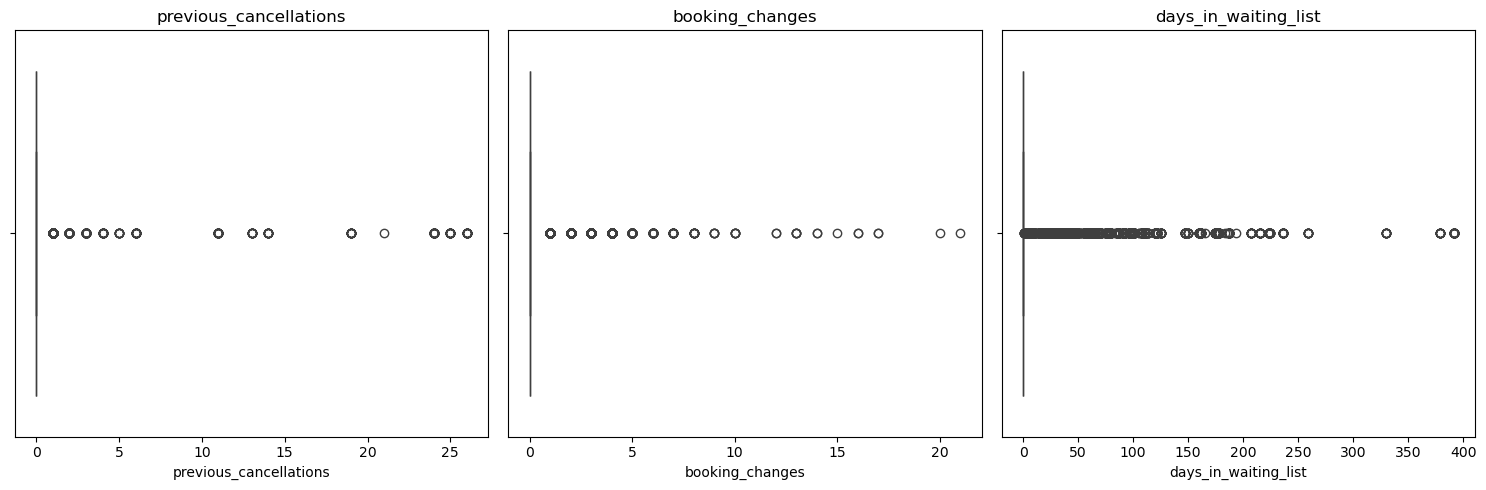

In [18]:
numeric_cols_to_plot1 = numeric_cols[:3]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, col in zip(axes, numeric_cols_to_plot1):
    sns.boxplot(x=df[col], orient="h", ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()


Review numeric feature distributions to detect skewness, extreme values, and anomalies that may require transformation or capping to improve model performance.

From the box and whisker plot we see that there are many outliers in each column. Each circle here represents outliers outside of the Inter Quartile Range that the plot measures. 

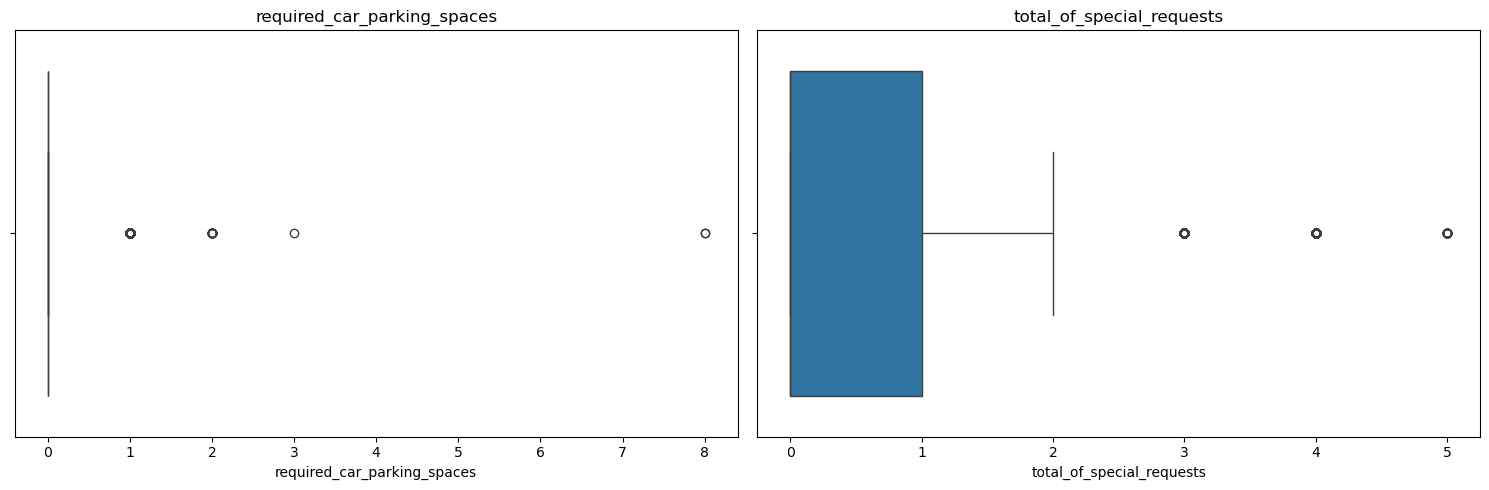

In [19]:
numeric_cols_to_plot2 = numeric_cols[-3:]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
for ax, col in zip(axes, numeric_cols_to_plot2):
    sns.boxplot(x=df[col], orient="h", ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

Again, We can see that most of the numeric columns actually have a lot of outliers. Only for the whisker plot of total special requests do we actually see the IQR box.

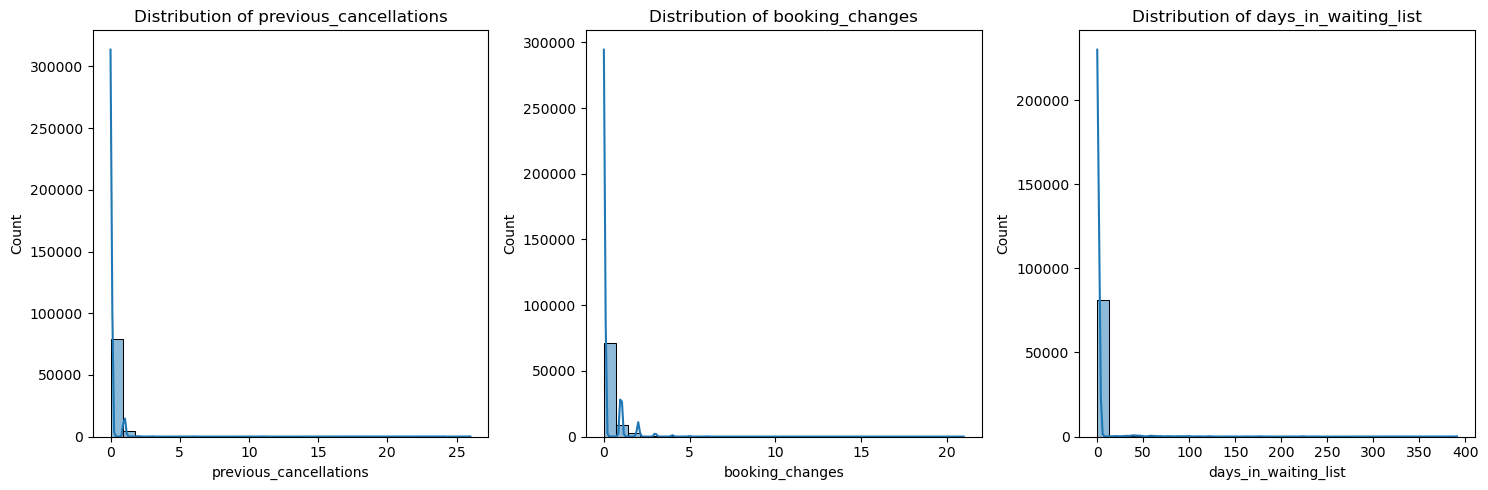

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, col in zip(axes, numeric_cols_to_plot1):
    sns.histplot(df[col], bins=30, kde=True, ax=ax)
    ax.set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

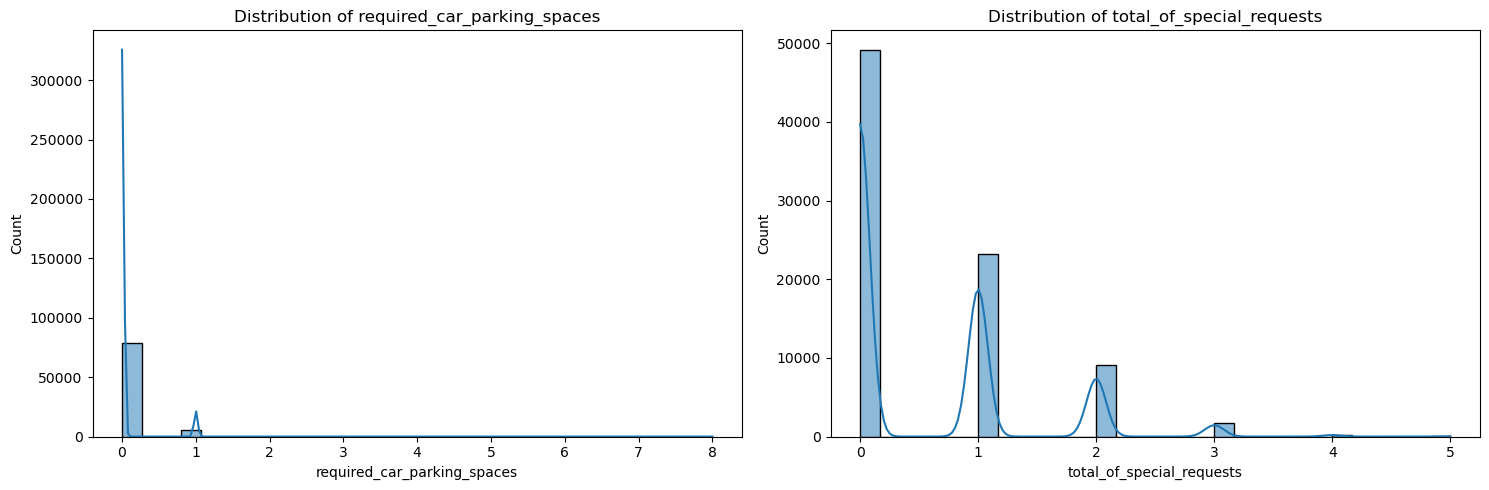

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for ax, col in zip(axes, numeric_cols_to_plot2):
    sns.histplot(df[col], bins=30, kde=True, ax=ax)
    ax.set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [22]:
# show outliers for numerical column 
lower = []
upper = []
lower_count = []
upper_count = []
outlier_proportion = []

for column in numeric_cols:
    IQR = df[column].quantile(0.75) - df[column].quantile(0.25)
    lower_bound = df[column].quantile(0.25) - 1.5 * IQR
    upper_bound = df[column].quantile(0.75) + 1.5 * IQR

    lower.append(lower_bound)
    upper.append(upper_bound)
    lower_count.append(len(df[df[column] < lower_bound]))
    upper_count.append(len(df[df[column] > upper_bound]))
    outlier_proportion.append(
        round((len(df[df[column] < lower_bound]) + len(df[df[column] > upper_bound])) / len(df) * 100, 2)
    )

outliers = pd.DataFrame({
    "Numeric Columns": numeric_cols,
    "Lower Bound": lower,
    "Upper Bound": upper,
    "# Lower": lower_count,
    "# Upper": upper_count,
    "% Outlier": outlier_proportion
})

outliers

,Numeric Columns,Lower Bound,Upper Bound,# Lower,# Upper,% Outlier
0,previous_cancellations,0.0,0.0,0,4513,5.40
1,booking_changes,0.0,0.0,0,12700,15.20
2,days_in_waiting_list,0.0,0.0,0,2585,3.09
3,required_car_parking_spaces,0.0,0.0,0,5227,6.25
4,total_of_special_requests,-1.5,2.5,0,2051,2.45
5,is_canceled,-1.5,2.5,0,0,0.00


In the chart above, we want to show how much of the data in these columns are being counted as outliers. For example, booking changes having over 15% data that falls in the outlier group is significant. When we start pre processing the data this has to be addressed somehow. 

We also want to review categorical feature distributions to detect imbalance, dominant categories, and rare labels that may require grouping before encoding.

In [23]:
# Count unique values for categorical columns
nunique_categorical = df[categorical_cols].nunique().reset_index()
nunique_categorical.columns = ['Feature', 'Unique Values']
nunique_categorical

,Feature,Unique Values
0,country,162
1,market_segment,8
2,deposit_type,3
3,customer_type,4
4,reserved_room_type,10


Again, we see another case of where it might be beneficial to drop country as a feature. High Cardinality, which means that it has contains so much possible values making it difficult for the model to determine noise

In [24]:
# Create an empty list to store summaries
all_cat_summary = []

for col in categorical_cols:
    counts = df[col].value_counts()
    percents = df[col].value_counts(normalize=True).mul(100).round(2)
    summary_df = pd.DataFrame({
        'Column': col,
        'Category': counts.index,
        'Count': counts.values,
        'Percentage': percents.values
    }).sort_values(by='Percentage', ascending=False)  # sort within column
    summary_df = summary_df.head(10)  # limit to top 10 per column
    all_cat_summary.append(summary_df)

# Combine all into one DataFrame
categorical_summary_df = pd.concat(all_cat_summary, ignore_index=True)

categorical_summary_df


,Column,Category,Count,Percentage
0,country,PRT,34097,40.97
1,country,GBR,8495,10.21
2,country,FRA,7307,8.78
3,country,ESP,5996,7.20
4,country,DEU,5116,6.15
5,country,ITA,2658,3.19
6,country,IRL,2340,2.81
7,country,BEL,1648,1.98
8,country,BRA,1553,1.87
9,country,USA,1472,1.77


Certain categories dominate in some features (e.g., Online TA in market_segment), while others appear very rarely. Will assess rare category handling in later cleaning steps.

Important to note that we see in the market segment feature of one row being 'Undefined'. Since it's only one value, it's not that significant to change or anything. We will just leave it as is. 


Summary: Categorical profiling complete. Several columns show strong category dominance, and some categories occur very rarely. These findings will inform encoding strategy and possible category grouping during Data Cleaning.

After going through the raw data there is an important decision to make regarding of one of the features. 

For feature country there are many considerations to dropping it. 

- High cardinality - country has lots of distinct values.

- One-hot encoding would produce many columns, making the dataset sparse and possibly slowing down training.

- Potentially low predictive power - If cancellation behavior doesn’t strongly depend on the customer’s country, it might add noise rather than signal. Some countries just have either 0% cancellation rate or 100% cancellation rate which will affect the model. 

- Small sample sizes per category - Countries with very few bookings don’t provide stable patterns for the model to learn from.

- Class imbalance within the feature - One country (e.g., PRT for Portugal) might dominate the data, making the rest negligible.

At this point we will just keep the country as a feature though. 



## **Section 4. Data Generation**

**4.1 Constructing `Seen` and `Unseen` Data**

To ensure a realistic evaluation of model performance, the dataset is split into Seen (used for model training and cross-validation) and Unseen (held-out final test) sets. The Seen data enables iterative model development and tuning, while the Unseen data simulates new, never-before-seen bookings, providing an unbiased measure of generalization. This approach mirrors real-world deployment, where the model will encounter future bookings not present during training, and prevents information leakage that could inflate performance metrics. Typically, you would use a time-based split, however in the case of our data, none of our columns actually provide data on timing. Therefore, we just make an arbitrary split of 80% Seen data and 20%  Unseen data.

In [25]:
# Defining Features & target
TARGET = 'is_canceled'

# Defining X and y
X = df.drop(columns=TARGET)
y = df[TARGET]
print(f"Features shape: {X.shape}")
print(f"Target shape  : {y.shape}")
# Displaying columns and target

Features shape: (83573, 10)
Target shape  : (83573,)


**4.2 Constructing `Training` and `Testing` Data (from `Seen` Dataset)**

To train and evaluate the model effectively, the Seen dataset is split into training and testing subsets. The training set is used for model fitting and cross-validation, while the testing set acts as a held-out portion to assess performance before the final Unseen evaluation. A stratified split is applied to preserve the original target distribution (cancellation rate ≈ 36.8%) across both subsets, ensuring class balance and preventing biased evaluation. Using a fixed random seed ensures reproducibility of the split for consistent results across runs.

In [26]:
# Create Seen (train) and Unseen (final holdout) data splits
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,       # 20% Unseen holdout
    stratify=y,           # preserve target proportion
    random_state=SEED     # use reproducibility variable
)

print(f"Seen (train) set: {X_train.shape}, {y_train.shape}")
print(f"Unseen (test) set: {X_test.shape}, {y_test.shape}")

Seen (train) set: (66858, 10), (66858,)
Unseen (test) set: (16715, 10), (16715,)


In [27]:
# Check target distribution and sizes in both splits
train_cancel_rate = y_train.mean()
test_cancel_rate  = y_test.mean()

print(f"Train cancellation rate: {train_cancel_rate:.2%} ({y_train.sum()} / {len(y_train)})")
print(f"Test  cancellation rate: {test_cancel_rate:.2%} ({y_test.sum()} / {len(y_test)})")
print("-" * 50)
print(f"Train size: {X_train.shape[0]} rows, Test size: {X_test.shape[0]} rows")

Train cancellation rate: 36.83% (24622 / 66858)
Test  cancellation rate: 36.83% (6156 / 16715)
--------------------------------------------------
Train size: 66858 rows, Test size: 16715 rows


While our target classes are not perfectly balanced (≈ 63% non-canceled vs. ≈ 37% canceled), this distribution is not considered severely imbalanced in most machine learning contexts. Class imbalance typically becomes a major concern when the minority class falls below ~10–20% of the dataset, as this can bias models toward predicting the majority class and lead to poor minority-class recall. In our case, the minority class still represents more than one-third of the data, providing sufficient representation for both training and evaluation without requiring techniques such as oversampling, undersampling, or synthetic data generation. That said, performance metrics sensitive to imbalance (e.g., recall, F1-score, ROC-AUC) are still prioritized to ensure the model performs well for the minority (canceled) class.

In [28]:
# Display unique values for each column in X_train
for col in X_train.columns:
    unique_values = X_train[col].unique()
    print(f"{col}:")
    print(", ".join(map(str, unique_values)))
    print("\n")

country:
PRT, BEL, FIN, ARE, FRA, DEU, AGO, ESP, CN, SWE, GBR, BRA, PRI, VEN, USA, ARG, IRL, NOR, CYP, IND, CHE, NGA, MAR, HKG, TUR, AUS, ITA, LBN, NLD, nan, POL, ECU, CHN, ROU, THA, AUT, ISR, VNM, CZE, EST, BGR, ISL, ZAF, DNK, GRC, SVN, RUS, UKR, LUX, IDN, CUB, URY, COL, LVA, PHL, JPN, DZA, SGP, HUN, DMA, SAU, IRN, HRV, PER, CHL, PAK, JOR, MEX, TUN, BEN, MOZ, BLR, AZE, CRI, KOR, TMP, LTU, ETH, EGY, NZL, UZB, GNB, SVK, MLT, SRB, MAC, MKD, BDI, TWN, KAZ, ALB, LBY, KNA, OMN, LIE, CPV, MDV, CIV, GIB, MYS, ABW, MUS, BIH, GGY, SEN, KHM, AND, BHR, KWT, SUR, QAT, GHA, PRY, ARM, IRQ, FRO, DOM, PAN, GEO, UGA, LKA, SYR, MMR, CAF, ZMB, BOL, CMR, BGD, JEY, GAB, MWI, KIR, LCA, MLI, TJK, SYC, PLW, BRB, JAM, TZA, AIA, RWA, ZWE, BWA, GLP, MNE, LAO, IMN, UMI, GTM, CYM, KEN, TGO, VGB, COM, MYT, BFA


market_segment:
Offline TA/TO, Online TA, Groups, Complementary, Direct, Corporate, Aviation


previous_cancellations:
0, 1, 2, 11, 6, 4, 26, 3, 5, 25, 13, 14, 24, 19, 21


booking_changes:
0, 1, 2, 3, 4, 5

## Customer Type

Indicates the **relationship and stay pattern** of the booking.

| Value              | Meaning |
|--------------------|---------|
| **Transient**      | Booking for a single stay and **not part of a group** or contract; most common for individual guests booking directly or through an agent. |
| **Transient-Party**| Similar to transient, but **linked with at least one other booking** (e.g., friends/family booking multiple rooms together but not via a formal group contract). |
| **Contract**       | Booking is **under a legal/long-term agreement** with a company or organization (e.g., a corporate rate, airline crew arrangement). |
| **Group**          | Booking is **part of an officially organized group** (e.g., a tour group, conference block booking). |

**Key Points:**
- Corporate/contract bookings may be less likely to cancel.
- Groups may have different cancellation patterns compared to individual travelers.

---

## Reserved Room Type

Represents the **code** for the room type initially reserved by the customer.  
Codes are anonymized (letters instead of descriptive names) to protect hotel privacy.

| Value | Notes |
|-------|-------|
| **A**, **B**, **C**, **D**, **E**, **F**, **G**, **H**, **L**, **P** | Each corresponds to a **specific room category** in the hotel's inventory (e.g., standard, deluxe, suite, different bed setups, view types). Actual descriptions are not provided for anonymity. |

**Key points:**
- The **reserved room type** may differ from the **assigned room type** at check-in (another column in the dataset).
- Differences can reflect **upgrades**, **downgrades**, or **inventory adjustments**.
- Certain room codes may have higher or lower cancellation rates depending on price and demand.

## Market Segment

Indicates the **source of the booking** and how the customer made the reservation.

| Value                | Meaning |
|----------------------|---------|
| **Offline TA/TO**    | Booked through an **offline travel agent** or **tour operator**, typically via in-person or phone transactions. |
| **Online TA**        | Booked through an **online travel agent** (e.g., Booking.com, Expedia). |
| **Direct**           | Booked **directly with the hotel** (via walk-in, phone, or the hotel's own website). |
| **Groups**           | Booked as part of a **formal group reservation** (e.g., conference, tour group). |
| **Corporate**        | Booked under a **corporate agreement** (e.g., company rates, business travel). |
| **Complementary**    | Room provided **free of charge**, often for promotional purposes or as compensation. |
| **Aviation**         | Booking made through an **airline agreement**, often for crew layovers or delayed flights. |
| **Undefined**        | Booking source not recorded or classified. |

**Key Points:**
- Customers from **corporate** or **aviation** segments may have different cancellation behaviors than **online travel agent** bookings.
- **Complementary** stays often have distinct patterns compared to paid bookings.
- Segment distribution can help identify **customer acquisition channels** and **seasonal booking trends**.



**4.3 Cross-Validation Strategy (for all model selection/tuning)**

In [29]:
# 5-fold CV, stratified, shuffled, reproducible
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=SEED
)
cv

StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

To ensure robust model selection and tuning, we use Stratified K-Fold Cross-Validation with 5 folds. Stratification preserves the target class distribution (canceled vs. non-canceled) across all folds, ensuring that each fold is representative of the overall dataset. Shuffling before splitting prevents order bias that might arise from patterns in the dataset, and setting a fixed random seed guarantees reproducibility of results. This approach maximizes the use of available data for both training and validation, helping to produce performance estimates that generalize well to unseen data.

## **Section 5. Data Preparation**

**5.1 Feature Initialization & Guardrails**

In [ ]:
#  Target & guardrails 
TARGET = "is_canceled"
LEAKAGE_COLS = []  # added known leaks here if any are identified later

#  Feature lists from X_train 
features_all = [c for c in X_train.columns if c not in LEAKAGE_COLS]
features_num = X_train[features_all].select_dtypes(include=["number"]).columns.tolist()
features_cat = [c for c in features_all if c not in features_num]

print("Counts - numeric:", len(features_num), "| categorical:", len(features_cat))

Counts - numeric: 5 | categorical: 5


To prepare the dataset for modeling, we first define the target variable (is_canceled) and identify any leakage columns that could inadvertently give the model access to future information, leading to overly optimistic results. We then separate the remaining features into numeric and categorical lists, which ensures that each data type receives the correct preprocessing steps later in the pipeline (e.g., scaling for numeric variables, encoding for categorical variables). This structured initialization acts as a guardrail, preventing accidental inclusion of inappropriate features and enabling a clean, reproducible preprocessing workflow.

**5.2 Preprocessing Plan**

Goal: create a single, leak-safe preprocessing pipeline that can be fit only on the Seen/train folds during cross-validation and reused unchanged for final evaluation and deployment.

Overall design: two parallel pipelines(one for numeric features, one for categorical) combined with a ColumnTransformer and executed inside the modeling pipeline.

**5.3 Rare-category grouping helper**

Rare Category Grouping – Consolidating Infrequent Categories

Many categorical variables in the dataset contain **low-frequency categories** that appear in only a small proportion of rows. While these rare values may be valid, they can introduce several challenges during model training and deployment.

Rationale for Grouping Rare Categories
1. **Model Stability**  
   Very rare categories can lead to unstable parameter estimates in statistical models and overly specific splits in tree-based models, reducing generalizability.

2. **Dimensionality Reduction**  
   One-hot encoding rare categories produces sparse dummy variables with very few positive cases, increasing feature space without meaningful signal.

3. **Handling Future Unseen Values**  
   Grouping infrequent categories into a single label provides a consistent strategy for managing truly unseen categories during inference.

4. **Noise Reduction**  
   Low-frequency categories are often driven by outlier cases or data entry inconsistencies, which can introduce noise rather than meaningful patterns.

---

Method Used
- Implemented a custom **RareCategoryGrouper** transformer using scikit-learn’s `BaseEstimator` and `TransformerMixin`.
- For each categorical column:
  - Calculate the relative frequency of each category.
  - Retain only categories whose proportion is **≥ `min_freq`** (default: 1% of the Seen data).
  - Replace all other categories with a single label (`__OTHER__` by default).
- This transformation is **fit only on the Seen/training folds** during cross-validation to avoid target leakage, and then applied consistently to validation/test data.

---

Columns Subject to Grouping
- All categorical variables identified in the preprocessing step (`features_cat`).

---

**Note:**  
By grouping rare categories before one-hot encoding, we reduce the risk of generating large numbers of uninformative dummy variables, improve model stability, and ensure that the preprocessing pipeline is robust to new/unseen categories at prediction time.

source: https://www.datacamp.com/tutorial/categorical-data?utm_source=chatgpt.com

In [ ]:
# Rare category grouper 

class RareCategoryGrouper(BaseEstimator, TransformerMixin):
    def __init__(self, min_freq=0.01, other_label="__OTHER__"):
        """
        min_freq: Minimum frequency threshold (proportion of total rows) for a category to be kept.
                  Categories below this threshold are replaced with `other_label`.
        other_label: Label used for rare categories.
        """
        self.min_freq = min_freq             # store chosen frequency threshold
        self.other_label = other_label       # store label name for rare categories
        self.maps_ = {}                      # will store set of allowed categories per column
        self.columns_ = []                   # will remember column names during fit

    def fit(self, X, y=None):
        X = pd.DataFrame(X)                  # ensure DataFrame interface
        self.columns_ = X.columns.tolist()   # remember column names

        n = len(X)                           # number of rows (for proportion calculation)
        for col in self.columns_:
            freq = X[col].value_counts(dropna=False) / n  # relative frequencies
            keep = freq[freq >= self.min_freq].index      # categories meeting threshold
            self.maps_[col] = set(map(str, keep))         # store as strings for consistency
        return self

    def transform(self, X):
        # defensive copy to avoid modifying caller's data
        X = pd.DataFrame(X).copy()
        X.columns = self.columns_  # restore original column names

        for col in self.columns_:
            # cast to string and replace values not in keep set with other_label
            X[col] = X[col].astype(str).where(
                X[col].astype(str).isin(self.maps_[col]),
                self.other_label
            )
        return X

**5.4 Outlier capping (IQR winsorization) for numeric features**

Outlier Handling – Capping Extreme Values

After examining the numeric columns, no negative or physically impossible values were found. However, certain variables showed extremely high values on the far right of their distribution, which could represent rare business cases or anomalies that might disproportionately influence the model.

Rationale for Capping
1. **Model Robustness**  
   Extreme values can distort the learning process in scale-sensitive algorithms (e.g., linear models, k-NN) and can affect stability in tree-based models when splits are influenced by rare extremes.

2. **Business Relevance**  
   Extremely large values (e.g., unusually high booking changes or long waiting list durations) occur rarely and may not represent typical customer patterns.

3. **Data Consistency**  
   Capping prevents extreme cases from overly influencing the model while maintaining the feature’s original range for the majority of records.

4. **Avoid Data Loss**  
   Instead of dropping rows, capping preserves all observations while limiting the impact of outliers.

---

Method Used
- Applied a custom **IQR-based transformer** (`IQRCapper`) implemented using scikit-learn’s `BaseEstimator` and `TransformerMixin`.
- For each numeric column:
  - Calculate the first quartile (**Q1**) and third quartile (**Q3**).
  - Compute the **interquartile range (IQR = Q3 − Q1)**.
  - Define caps using **Tukey’s fences**:
    - Lower bound = Q1 − (factor × IQR)  
    - Upper bound = Q3 + (factor × IQR)  
    - Default factor = **1.5** (standard for moderate outlier detection).
  - Clip values below/above these bounds to the caps.

---

Columns Subject to Capping
- All numeric features in the dataset at the time of preprocessing.

---

**Note:**  
This method balances **statistical best practices** with **business context**, ensuring that outlier handling is reproducible within the model pipeline and applied consistently during cross-validation and deployment.

source: https://medium.com/%40bhatshrinath41/quick-guide-to-outlier-treatment-ada01f8cfc5

In [ ]:
# IQR Capping Transformer 

class IQRCapper(BaseEstimator, TransformerMixin):
    def __init__(self, factor=1.5):
        """
        factor: Tukey fence multiplier. 1.5 is standard; larger values = looser capping.
        """
        self.factor = factor                 # store the chosen IQR multiplier
        self.bounds_ = {}                    # will hold per-column (low, high) caps
        self.columns_ = []                   # will record column names seen during fit

    def fit(self, X, y=None):
        X = pd.DataFrame(X)                  # ensure a DataFrame interface
        self.columns_ = X.columns.tolist()   # remember column order/names

        # compute caps for each numeric column using Tukey's fences
        for col in self.columns_:
            q1 = X[col].quantile(0.25)       # first quartile (25th percentile)
            q3 = X[col].quantile(0.75)       # third quartile (75th percentile)
            iqr = q3 - q1                    # interquartile range
            lo = q1 - self.factor * iqr      # lower cap
            hi = q3 + self.factor * iqr      # upper cap
            self.bounds_[col] = (lo, hi)     # store caps for this column

        return self                          # scikit-learn convention: return self

    def transform(self, X):
        # make a defensive copy so we don't mutate caller's data
        X = pd.DataFrame(X).copy()

        # restore original column names (important inside ColumnTransformer)
        X.columns = self.columns_

        # apply clipping per column based on fitted caps
        for col, (lo, hi) in self.bounds_.items():
            X[col] = X[col].clip(lower=lo, upper=hi)

        return X                              # return transformed DataFrame


Variance Threshold – Removing Constant Features

**Purpose:**  
Eliminate features with no variability (constant columns) that carry no predictive information.

**Why it’s here:**  
Constant columns can appear after preprocessing steps such as one-hot encoding or rare category grouping. These features provide no value to the model and can be safely removed to simplify the feature space.

**Why `threshold=0.0`:**  
A threshold of `0.0` removes only **truly constant** columns (zero variance).  
Using a higher threshold could also remove features with small but non-zero variance, which may still contain useful signal.

source: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html

In [33]:
var_thresh = VarianceThreshold(threshold=0.0)

**5.5 Encoders, imputers, and scalers**

Preprocessing Pipeline Overview

Numeric Pipeline (`features_num`)
1. **Impute (median)** – fills missing values in a way that is robust to skew and outliers.  
2. **Outlier capping (`IQRCapper`, 1.5×IQR)** – caps extreme values to reduce the influence of heavy tails while preserving rank and order.  
3. **Scale (`StandardScaler`)** – centers and scales features so that linear and distance-based models behave well.  
4. **Variance filter (`VarianceThreshold=0`)** – removes constant/all-identical columns after imputation and capping.

**Why this order?**  
*Impute → Cap → Scale* ensures that we avoid scaling NaNs or unbounded extremes, and the variance check runs last so it reflects the post-imputation values.

Since our pipeline already includes IQR capping before scaling, we already reduced the influence of extreme outliers. This means StandardScaler is generally safe in our current setup, because the heavy tails are clipped before scaling.

---

Categorical Pipeline (`features_cat`)
1. **Impute (most_frequent)** – replaces missing categories with the most common category (mode).  
2. **Rare category grouping (`min_freq=0.01`)** – collapses infrequent labels into `"Other"` to stabilize one-hot encoding and reduce noise.  
3. **One-hot encode (`handle_unknown='ignore', drop='if_binary'`)** – creates model-friendly indicator variables and auto-treats true binaries as single columns.  
4. **Variance filter (`VarianceThreshold=0`)** – removes empty or single-level dummies that can arise after grouping.

**Why this order?**  
*Impute before grouping* ensures missing values are not treated as separate rare categories. *Group before encoding* to avoid unnecessarily large sparse matrices from one-hot encoding rare labels.

---

Column Combination & Leakage Control
- A **`ColumnTransformer`** applies the numeric and categorical pipelines to their respective feature lists, dropping all other columns (`remainder='drop'`).  
- The entire `preprocessor` is placed inside the model’s `Pipeline` and is **fit only on training folds during cross-validation**.  
- This prevents **look-ahead leakage** into validation folds and the Unseen holdout set, ensuring robust and unbiased performance estimates.


In [34]:
num_pipeline = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="median")),         # fill missing numbers
    ("cap",    IQRCapper(factor=1.5)),                     # cap outliers
    ("scale",  StandardScaler()),                          # standardize
    ("var",    VarianceThreshold(threshold=0.0))           # drop constants
])

cat_pipeline = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="most_frequent")),   # fill missing categories
    ("rare",   RareCategoryGrouper(min_freq=0.01)),        # group rare categories
    ("onehot", OneHotEncoder(handle_unknown="ignore",
                             drop="if_binary",
                             sparse_output=False)),        # one-hot encode
    ("var",    VarianceThreshold(threshold=0.0))           # drop constants
])


preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipeline, features_num),
        ("cat", cat_pipeline, features_cat)
    ],
    remainder="drop"
)


**5.6 Final preprocessing overview before modeling**

Fit only on Seen; inspect shapes & feature names (helps debugging and Section 6.1 recap).

In [35]:
# Fit on Seen (training) only
preprocessor_fitted = preprocessor.fit(X_train)

# Transform both sets
X_train_prep = preprocessor_fitted.transform(X_train)
X_test_prep  = preprocessor_fitted.transform(X_test)

print("Prepared shapes →",
      "X_train_prep:", X_train_prep.shape,
      "| X_test_prep:",  X_test_prep.shape)


Prepared shapes → X_train_prep: (66858, 35) | X_test_prep: (16715, 35)


Before proceeding to model training, it is essential to fit and lock the preprocessing pipeline on the Seen (training) data only. This ensures that all imputation values, outlier caps, scaling parameters, and category mappings are learned solely from the training set, preventing data leakage from the Unseen test set.

Once fitted, the same preprocessor is applied to both the training and test sets, guaranteeing that identical transformations are used during training, validation, and final evaluation.

Inspecting the resulting shapes after preprocessing serves two purposes:

Debugging – verifies that the number of features matches expectations (e.g., post-encoding and variance filtering).

Traceability – confirms that both training and test sets have identical feature dimensions, which is critical for successful model fitting and evaluation.

In this case, the output confirms that the prepared training and test datasets each contain 35 features, ensuring readiness for the modeling phase.

In [36]:
# Feature names after VarThresh
def get_final_feature_names(prep, num_cols, cat_cols):
    # names prior to VarianceThreshold
    ohe = prep.named_transformers_["cat"].named_steps["onehot"]
    cat_ohe_names = ohe.get_feature_names_out(cat_cols).tolist()
    num_names = num_cols

    # masks from each VarianceThreshold
    num_keep = prep.named_transformers_["num"].named_steps["var"].get_support()
    cat_keep = prep.named_transformers_["cat"].named_steps["var"].get_support()

    kept_num = [n for n, keep in zip(num_names, num_keep) if keep]
    kept_cat = [n for n, keep in zip(cat_ohe_names, cat_keep) if keep]
    return kept_num + kept_cat

final_feature_names = get_final_feature_names(preprocessor_fitted, features_num, features_cat)
print(f"Final feature count: {len(final_feature_names)}")
print("Final features:", final_feature_names)

Final feature count: 35
Final features: ['total_of_special_requests', 'country_AUT', 'country_BEL', 'country_BRA', 'country_CHE', 'country_CN', 'country_DEU', 'country_ESP', 'country_FRA', 'country_GBR', 'country_IRL', 'country_ITA', 'country_NLD', 'country_PRT', 'country_USA', 'country___OTHER__', 'market_segment_Corporate', 'market_segment_Direct', 'market_segment_Groups', 'market_segment_Offline TA/TO', 'market_segment_Online TA', 'market_segment___OTHER__', 'deposit_type_No Deposit', 'deposit_type_Non Refund', 'deposit_type___OTHER__', 'customer_type_Contract', 'customer_type_Transient', 'customer_type_Transient-Party', 'customer_type___OTHER__', 'reserved_room_type_A', 'reserved_room_type_D', 'reserved_room_type_E', 'reserved_room_type_F', 'reserved_room_type_G', 'reserved_room_type___OTHER__']


After preprocessing, the feature set may differ from the original list due to one-hot encoding (expanding categorical variables into multiple binary columns) and the VarianceThreshold step (removing constant features). To maintain clarity and traceability, it’s important to know exactly which features remain in the final dataset fed into the model.

This function:

Retrieves the numeric and categorical feature names before variance filtering.

Applies the boolean masks from VarianceThreshold to filter out features that were dropped for having zero variance.

Combines the filtered numeric and categorical feature names into the final list of active features.

By printing the final feature count and a sample of the feature names, we can confirm that the preprocessing pipeline has produced the expected number of usable features (in this case, 35), ensuring model compatibility and interpretability.

**5.7 Convert to DataFrame + sanity checks**

In [37]:
# Make DataFrames (This is done to help debugging and do some model introspection)
X_train_prep_df = pd.DataFrame(X_train_prep, columns=final_feature_names, index=X_train.index)
X_test_prep_df  = pd.DataFrame(X_test_prep,  columns=final_feature_names, index=X_test.index)

# Basic sanity checks
assert not np.isnan(X_train_prep_df.values).any(), "NaNs found in X_train_prep_df!"
assert not np.isnan(X_test_prep_df.values).any(),  "NaNs found in X_test_prep_df!"
assert X_train_prep_df.shape[1] == X_test_prep_df.shape[1] == len(final_feature_names)

print("Prepared DF shapes →",
      "X_train_prep_df:", X_train_prep_df.shape,
      "| X_test_prep_df:",  X_test_prep_df.shape)

Prepared DF shapes → X_train_prep_df: (66858, 35) | X_test_prep_df: (16715, 35)


In [38]:
X_train_prep_df

,total_of_special_requests,country_AUT,country_BEL,country_BRA,country_CHE,country_CN,country_DEU,country_ESP,country_FRA,country_GBR,country_IRL,country_ITA,country_NLD,country_PRT,country_USA,country___OTHER__,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment___OTHER__,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type___OTHER__,customer_type_Contract,customer_type_Transient,customer_type_Transient-Party,customer_type___OTHER__,reserved_room_type_A,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type___OTHER__
52221,-0.746193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30227,-0.746193,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
55059,-0.746193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
80067,1.935938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68110,-0.746193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17270,-0.746193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
65030,0.594873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
38098,0.594873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
35139,-0.746193,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [39]:
X_test_prep_df

,total_of_special_requests,country_AUT,country_BEL,country_BRA,country_CHE,country_CN,country_DEU,country_ESP,country_FRA,country_GBR,country_IRL,country_ITA,country_NLD,country_PRT,country_USA,country___OTHER__,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment___OTHER__,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type___OTHER__,customer_type_Contract,customer_type_Transient,customer_type_Transient-Party,customer_type___OTHER__,reserved_room_type_A,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type___OTHER__
22336,1.935938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
56718,-0.746193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
44414,-0.746193,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4511,0.594873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
49620,-0.746193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50468,0.594873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
45935,-0.746193,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
54136,0.594873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
36863,-0.746193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [40]:
# Check for zero-variance (constant) columns after preprocessing
n_unique_train = X_train_prep_df.nunique(dropna=False)
constant_cols = n_unique_train[n_unique_train <= 1].index.tolist()
print(f"Constant columns after prep: {len(constant_cols)}")
if constant_cols[:10]: print("Sample:", constant_cols[:10])


Constant columns after prep: 0


## Post-Preprocessing Data Conversion & Integrity Checks

After preprocessing, the transformed arrays from the pipeline are converted back into **pandas DataFrames** with:
- **Meaningful feature names**
- **Original row indices**

This step is not strictly necessary for modeling, but it significantly improves **debugging**, **interpretability**, and **model introspection**.

---

### Sanity Checks After Conversion

Once converted, several checks are performed to ensure **data integrity** before modeling:

1. **Missing value check**  
   - Asserts that no `NaN` values remain after preprocessing for both training and test sets.

2. **Shape alignment check**  
   - Verifies that the number of columns matches the number of final feature names, ensuring consistent schema between training and test sets.

3. **Zero-variance check**  
   - Confirms that no constant columns remain after preprocessing (especially post-one-hot encoding and variance filtering).  
   - If any are found, they are listed for review.

---

### Current Results
- Training and test DataFrames have **identical shapes** (`35` features each)  
- **No missing values** remain  
- **No constant columns** are present  

**Conclusion:** The dataset is clean, consistent, and ready for modeling.




## **Section 6. Model Development**

**6.1 Initialization – Scoring & CV Helper**

This section defines **what we measure** and a **reusable function** to benchmark any classifier with consistent preprocessing and cross‑validation.

Central place to declare evaluation metrics.

We include Recall and F1 (business focus), plus ROC‑AUC and PR‑AUC for probability quality on imbalanced data.

In [ ]:
SCORING = {
    "roc_auc": "roc_auc",
    "pr_auc": "average_precision",   # PR-AUC
    "f1": "f1",
    "recall": "recall",
    "precision": "precision",
    "accuracy": "accuracy",
}

def eval_models_multi(models, X, y, scoring=SCORING, sort_by="f1", ascending=False):
    """Cross-validate each model on all metrics in `scoring`.
       Returns a single tidy table with mean/std for every metric."""
    rows = []
    for name, clf in models.items():
        # 1) Wrap preprocessor + model to prevent leakage
        pipe = Pipeline([("preprocess", preprocessor), ("model", clf)])

        # 2) Cross‑validate on **raw** X, y using the global CV object
        cvout = cross_validate(pipe, X, y, cv=cv, scoring=scoring, n_jobs=-1)

        # 3) Collect mean/std for each metric
        row = {"model": name}
        for m in scoring.keys():
            vals = cvout[f"test_{m}"]
            row[f"{m}_mean"] = vals.mean()
            row[f"{m}_std"]  = vals.std()
        rows.append(row)

    # 4) Return a sorted, nicely formatted table
    df = (pd.DataFrame(rows)
            .set_index("model")
            .sort_values(f"{sort_by}_mean", ascending=ascending))
    return df.round(4)  # nicer display

**6.2 Baseline Model Benchmarking with Cross-Validation**

Combine preprocessing from Section 6 with model in a single Pipeline or ColumnTransformer.

Start with baseline models (Logistic Regression, Decision Tree, etc.).

In [42]:
logreg  = LogisticRegression(random_state=SEED, solver='liblinear', max_iter=1000)
knn     = KNeighborsClassifier(n_neighbors=5)                 # no random_state
dtree   = DecisionTreeClassifier(random_state=SEED, max_depth=5)
rf      = RandomForestClassifier(random_state=SEED, n_estimators=300, n_jobs=-1)
ada     = AdaBoostClassifier(random_state=SEED)
gbm     = GradientBoostingClassifier(random_state=SEED)
lgbm    = LGBMClassifier(random_state=SEED)
xgboost = XGBClassifier(random_state=SEED, eval_metric='logloss', tree_method='hist')

models = {
    "Logistic Regression": logreg,
    "KNN": knn,
    "Decision Tree": dtree,
    "Random Forest": rf,
    "AdaBoost": ada,
    "Gradient Boosting": gbm,
    "LightGBM": lgbm,
    "XGBoost": xgboost
}

print("Models to evaluate:", list(models.keys()))

Models to evaluate: ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'LightGBM', 'XGBoost']


Train multiple baseline models.

Compare them using cross-validation scores on the training set.

In [43]:
baseline_table = eval_models_multi(
    models, X_train, y_train, scoring=SCORING, sort_by="f1", ascending=False
)
print("Baseline summary (CV=5, sorted by F1):")
display(baseline_table)

Baseline summary (CV=5, sorted by F1):


,roc_auc_mean,roc_auc_std,pr_auc_mean,pr_auc_std,f1_mean,f1_std,recall_mean,recall_std,precision_mean,precision_std,accuracy_mean,accuracy_std
model,,,,,,,,,,,,
Decision Tree,0.8517,0.0014,0.7724,0.0034,0.6956,0.0041,0.6861,0.0073,0.7053,0.0025,0.7788,0.0022
Random Forest,0.8621,0.0022,0.8102,0.0034,0.6943,0.0049,0.6631,0.0091,0.7287,0.0037,0.7850,0.0024
XGBoost,0.8644,0.0021,0.8123,0.0035,0.6882,0.0108,0.6458,0.0236,0.7375,0.0061,0.7848,0.0031
LightGBM,0.8644,0.0020,0.8122,0.0034,0.6835,0.0064,0.6314,0.0132,0.7453,0.0071,0.7848,0.0028
Gradient Boosting,0.8599,0.0024,0.8058,0.0040,0.6673,0.0039,0.5948,0.0120,0.7605,0.0143,0.7816,0.0031
KNN,0.8198,0.0048,0.7230,0.0043,0.6661,0.0070,0.6579,0.0239,0.6763,0.0266,0.7571,0.0109
Logistic Regression,0.8367,0.0023,0.7836,0.0035,0.5989,0.0135,0.4909,0.0190,0.7686,0.0065,0.7581,0.0044
AdaBoost,0.8334,0.0017,0.7680,0.0033,0.5383,0.0051,0.3877,0.0055,0.8803,0.0073,0.7551,0.0018


In [44]:
def leaderboard(df, metric, top=5):
    cols = [f"{metric}_mean", f"{metric}_std"]
    return (df[cols].sort_values(f"{metric}_mean", ascending=False).head(top))

print("Top models by ROC-AUC")
display(leaderboard(baseline_table, "roc_auc"))

print("Top models by Recall")
display(leaderboard(baseline_table, "recall"))

print("Top models by F1")
display(leaderboard(baseline_table, "f1"))

Top models by ROC-AUC


,roc_auc_mean,roc_auc_std
model,,
XGBoost,0.8644,0.0021
LightGBM,0.8644,0.0020
Random Forest,0.8621,0.0022
Gradient Boosting,0.8599,0.0024
Decision Tree,0.8517,0.0014


Top models by Recall


,recall_mean,recall_std
model,,
Decision Tree,0.6861,0.0073
Random Forest,0.6631,0.0091
KNN,0.6579,0.0239
XGBoost,0.6458,0.0236
LightGBM,0.6314,0.0132


Top models by F1


,f1_mean,f1_std
model,,
Decision Tree,0.6956,0.0041
Random Forest,0.6943,0.0049
XGBoost,0.6882,0.0108
LightGBM,0.6835,0.0064
Gradient Boosting,0.6673,0.0039


### Model Shortlisting Rationale

From the baseline benchmarking, we shortlisted **LightGBM**, **Random Forest**, and **XGBoost** for hyperparameter tuning.

**Selection Criteria:**
1. **High ROC-AUC** - All three models rank among the top performers for ROC-AUC, showing strong ability to discriminate between cancelled and non-cancelled bookings.
2. **Competitive F1-score** - Each model achieves a top-5 F1 score, indicating balanced performance between Recall and Precision.
3. **Solid Recall** - While baseline Recall is below the business target (≥ 0.80), these models are close to the leaders and have strong potential for improvement with tuning and threshold optimization.

**Business Context:**
- **Primary objective**: Capture at least 80% of actual cancellations (Recall ≥ 0.80) so the hotel can proactively resell rooms or adjust staffing.
- **Secondary objective**: Maintain balanced performance (F1-score ≥ 0.75) to limit false positives and avoid unnecessary operational actions.
- Starting from models with strong discrimination power (ROC-AUC) increases the likelihood that tuning can push Recall and F1 to business thresholds.

**Why these models:**
- **LightGBM** - Joint highest ROC-AUC in the baseline; also competitive in F1. Highly efficient and flexible, making it well-suited for tuning learning rate, depth, and regularization to lift Recall.
- **Random Forest** - Strong across all three metrics (ROC-AUC, Recall, F1). Naturally robust to noise and a solid choice for tabular, feature-rich datasets.
- **XGBoost** - Matches LightGBM’s ROC-AUC and scores highly in F1; a proven boosting method with fine control over regularization and tree complexity.

These models represent the best balance between **current performance** and **optimization potential** to reach the business success criteria.


### 6.3 Hyperparameter tuning

Before running `RandomizedSearchCV`, define the metrics to track during hyperparameter tuning and choose a primary metric (`REFIT_METRIC`) for selecting the best model.

In this case:
- **Tracked metrics**: Recall, F1, ROC-AUC, and PR-AUC - ensuring both discrimination power and balanced classification performance are monitored.
- **REFIT_METRIC**: Recall - aligns directly with the business goal of capturing the majority of actual cancellations.

By explicitly setting these, we ensure that:
1. The tuning process is optimized for the business-critical metric (Recall).
2. Other metrics are logged for performance trade-off analysis.


In [45]:
# Primary + tracked metrics for hyperparameter tuning
tuning_scoring = {
    "recall": make_scorer(recall_score),
    "f1": make_scorer(f1_score),
    "roc_auc": "roc_auc",
    "pr_auc": "average_precision"
}

REFIT_METRIC = "recall"


In [ ]:
# Pipelines
pipe_rf = Pipeline([
    ("prep", preprocessor),
    ("clf",  RandomForestClassifier(n_jobs=-1, random_state=SEED))
])

pipe_xgb = Pipeline([
    ("prep", preprocessor),
    ("clf",  XGBClassifier(
        eval_metric="logloss",
        tree_method="hist",
        random_state=SEED,
        n_jobs=-1
    ))
])

pipe_lgbm = Pipeline([
    ("prep", preprocessor),
    ("clf",  LGBMClassifier(
        random_state=SEED,
        n_jobs=-1
    ))
])


In [47]:
rf_params = {
    "clf__n_estimators":   [200, 400, 600],
    "clf__max_depth":      [None, 8, 12],
    "clf__min_samples_leaf":[1, 2, 4],
    "clf__class_weight":   [None, "balanced"]
}

- **`n_estimators`** - Number of trees in the forest. More trees can improve stability and performance but increase training time.  
- **`max_depth`** - Maximum depth of each tree. Controls how much the model can learn patterns; deeper trees can capture more complexity but risk overfitting.  
- **`min_samples_leaf`** - Minimum number of samples required to be in a leaf node. Higher values reduce overfitting by forcing leaves to contain more samples.  
- **`class_weight`** - Adjusts the weight of classes when splitting nodes. Setting to `"balanced"` can help handle class imbalance by giving more importance to the minority class.


In [48]:
xgb_params = {
    "clf__n_estimators":   [300, 500, 700],
    "clf__max_depth":      [3, 5, 7],
    "clf__learning_rate":  [0.03, 0.1, 0.2],
    "clf__subsample":      [0.7, 0.9, 1.0],
    "clf__colsample_bytree":[0.7, 0.9, 1.0],
    "clf__scale_pos_weight":[1.0, 1.2],  
}

- **`n_estimators`** - Number of boosting rounds (trees) to build. Each round adds a decision tree to the ensemble. More trees can improve performance up to a point, but may increase training time and risk of overfitting if too high.  
- **`max_depth`** - Maximum depth of each tree. Controls how much interaction the tree can capture; deeper trees fit more complex patterns but may overfit, especially on small datasets.  
- **`learning_rate`** - Shrinks each tree’s contribution by this factor. Lower values make learning more gradual (requiring more trees), which can improve generalization.  
- **`subsample`** - Fraction of training rows randomly sampled for each boosting round. Values < 1.0 add randomness, improving generalization and reducing overfitting (similar to bagging).  
- **`colsample_bytree`** - Fraction of features randomly sampled for each tree. Lower values create more diverse trees and help reduce overfitting, but risk excluding important features too often.  
- **`scale_pos_weight`** - Weighting factor to balance positive and negative classes (for imbalanced data).  
    - `1.0` - No adjustment.  
    - Values > 1.0 increase the influence of the positive class (useful if positives are rare).


In [49]:
lgbm_params = {
    "clf__n_estimators":   [300, 500, 700],
    "clf__num_leaves":     [31, 63, 95],
    "clf__learning_rate":  [0.03, 0.1, 0.2],
    "clf__subsample":      [0.7, 0.9, 1.0],
    "clf__colsample_bytree":[0.7, 0.9, 1.0],
}

- **`n_estimators`** - Number of boosting rounds (trees) to build. More trees can improve accuracy up to a point, but increase training time and risk of overfitting if set too high.  
- **`num_leaves`** - Maximum number of leaves in each tree. Higher values allow capturing more complex patterns, but can lead to overfitting. This is a key parameter for controlling model complexity in LightGBM.  
- **`learning_rate`** - Shrinks the contribution of each tree. Lower values slow learning (requiring more trees), which can improve generalization.  
- **`subsample`** - Fraction of training rows randomly sampled for each boosting round. Values < 1.0 add randomness to improve generalization and reduce overfitting.  
- **`colsample_bytree`** - Fraction of features randomly sampled for each tree. Lower values make trees more diverse and can reduce overfitting, but risk excluding useful features too often.


In [ ]:
#  RandomizedSearchCV objects (Recall-refit) 
N_ITER = 40 

search_rf = RandomizedSearchCV(
    estimator=pipe_rf,
    param_distributions=rf_params,
    n_iter=N_ITER,
    scoring=tuning_scoring,          
    refit=REFIT_METRIC,              # "recall"
    cv=cv,
    n_jobs=-1,
    random_state=SEED,
    verbose=1,
    return_train_score=False,
    error_score="raise"
)


search_xgb = RandomizedSearchCV(
    estimator=pipe_xgb,
    param_distributions=xgb_params,
    n_iter=N_ITER,
    scoring=tuning_scoring,
    refit=REFIT_METRIC,
    cv=cv,
    n_jobs=-1,
    random_state=SEED,
    verbose=1,
    return_train_score=False,
    error_score="raise"
)

search_lgbm = RandomizedSearchCV(
    estimator=pipe_lgbm,
    param_distributions=lgbm_params,
    n_iter=N_ITER,
    scoring=tuning_scoring,
    refit=REFIT_METRIC,
    cv=cv,
    n_jobs=-1,
    random_state=SEED,
    verbose=1,
    return_train_score=False,
    error_score="raise"
)

In [ ]:
# Run Searches RandomForest 
search_rf.fit(X_train, y_train)
print("RF   best recall (CV, refit):", search_rf.best_score_)
print("RF   best params:", search_rf.best_params_)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
RF   best recall (CV, refit): 0.7782465248425819
RF   best params: {'clf__n_estimators': 200, 'clf__min_samples_leaf': 1, 'clf__max_depth': None, 'clf__class_weight': 'balanced'}


In [ ]:
#  Run Searches XGBoost 
search_xgb.fit(X_train, y_train)
print("XGB  best recall (CV, refit):", search_xgb.best_score_)
print("XGB  best params:", search_xgb.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
XGB  best recall (CV, refit): 0.6955967786496885
XGB  best params: {'clf__subsample': 0.7, 'clf__scale_pos_weight': 1.2, 'clf__n_estimators': 700, 'clf__max_depth': 7, 'clf__learning_rate': 0.1, 'clf__colsample_bytree': 1.0}


In [ ]:
#  Run Searches lgbm  
search_lgbm.fit(X_train, y_train)
print("LGBM best recall (CV, refit):", search_lgbm.best_score_)
print("LGBM best params:", search_lgbm.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[LightGBM] [Info] Number of positive: 24622, number of negative: 42236
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006154 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 73
[LightGBM] [Info] Number of data points in the train set: 66858, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368273 -> initscore=-0.539633
[LightGBM] [Info] Start training from score -0.539633
LGBM best recall (CV, refit): 0.664648806013847
LGBM best params: {'clf__subsample': 1.0, 'clf__num_leaves': 95, 'clf__n_estimators': 500, 'clf__learning_rate': 0.2, 'clf__colsample_bytree': 0.9}


In [ ]:
#  Compare CV leaderboards 
def leaderboard(search):
    df = pd.DataFrame(search.cv_results_)
    keep = ["rank_test_recall","mean_test_recall","mean_test_f1","mean_test_roc_auc","mean_test_pr_auc","params"]
    return df.sort_values("rank_test_recall")[keep].head(10)

In [55]:
lb_rf  = leaderboard(search_rf)
lb_xgb = leaderboard(search_xgb)
lb_lgbm = leaderboard(search_lgbm)


print("=== LightGBM leaderboard ===")
display(lb_lgbm)
print("=== RandomForest leaderboard ===")
display(lb_rf)
print("=== XGBoost leaderboard ===")
display(lb_xgb)

=== LightGBM leaderboard ===


,rank_test_recall,mean_test_recall,mean_test_f1,mean_test_roc_auc,mean_test_pr_auc,params
2,1,0.664649,0.694700,0.862808,0.810850,"{'clf__subsample': 1.0, 'clf__num_leaves': 95,..."
7,1,0.664649,0.694700,0.862808,0.810850,"{'clf__subsample': 0.7, 'clf__num_leaves': 95,..."
15,3,0.664568,0.694697,0.862694,0.810740,"{'clf__subsample': 1.0, 'clf__num_leaves': 95,..."
3,4,0.664527,0.694707,0.862778,0.810815,"{'clf__subsample': 0.9, 'clf__num_leaves': 95,..."
39,5,0.664486,0.694699,0.862674,0.810724,"{'clf__subsample': 0.7, 'clf__num_leaves': 95,..."
4,6,0.664446,0.694690,0.862826,0.810842,"{'clf__subsample': 0.9, 'clf__num_leaves': 63,..."
18,7,0.664446,0.694830,0.863100,0.811137,"{'clf__subsample': 0.7, 'clf__num_leaves': 63,..."
37,8,0.664283,0.694832,0.863284,0.811415,"{'clf__subsample': 0.9, 'clf__num_leaves': 95,..."
29,9,0.664202,0.694645,0.863170,0.811265,"{'clf__subsample': 1.0, 'clf__num_leaves': 31,..."
16,10,0.663958,0.694593,0.863159,0.811248,"{'clf__subsample': 1.0, 'clf__num_leaves': 31,..."


=== RandomForest leaderboard ===


,rank_test_recall,mean_test_recall,mean_test_f1,mean_test_roc_auc,mean_test_pr_auc,params
30,1,0.778247,0.713111,0.862391,0.810528,"{'clf__n_estimators': 200, 'clf__min_samples_l..."
33,2,0.778125,0.713105,0.862463,0.810705,"{'clf__n_estimators': 600, 'clf__min_samples_l..."
31,3,0.775688,0.713720,0.863764,0.811800,"{'clf__n_estimators': 400, 'clf__min_samples_l..."
24,4,0.775607,0.713832,0.863699,0.811655,"{'clf__n_estimators': 200, 'clf__min_samples_l..."
9,5,0.775607,0.713752,0.863737,0.811718,"{'clf__n_estimators': 600, 'clf__min_samples_l..."
19,6,0.773210,0.714123,0.864001,0.811709,"{'clf__n_estimators': 200, 'clf__min_samples_l..."
14,7,0.772804,0.714282,0.864102,0.811890,"{'clf__n_estimators': 400, 'clf__min_samples_l..."
18,8,0.755462,0.713008,0.864355,0.811797,"{'clf__n_estimators': 200, 'clf__min_samples_l..."
29,9,0.754650,0.712907,0.864289,0.811678,"{'clf__n_estimators': 600, 'clf__min_samples_l..."
1,10,0.750426,0.711863,0.864129,0.811282,"{'clf__n_estimators': 400, 'clf__min_samples_l..."


=== XGBoost leaderboard ===


,rank_test_recall,mean_test_recall,mean_test_f1,mean_test_roc_auc,mean_test_pr_auc,params
15,1,0.695597,0.702083,0.863330,0.811214,"{'clf__subsample': 0.7, 'clf__scale_pos_weight..."
25,2,0.695272,0.702384,0.863328,0.811366,"{'clf__subsample': 0.9, 'clf__scale_pos_weight..."
26,3,0.693200,0.701872,0.863340,0.811295,"{'clf__subsample': 0.9, 'clf__scale_pos_weight..."
1,4,0.692957,0.701945,0.863472,0.811526,"{'clf__subsample': 0.9, 'clf__scale_pos_weight..."
27,5,0.692551,0.701418,0.863236,0.811098,"{'clf__subsample': 0.7, 'clf__scale_pos_weight..."
36,6,0.692307,0.701700,0.863451,0.811431,"{'clf__subsample': 1.0, 'clf__scale_pos_weight..."
7,7,0.690642,0.702537,0.864302,0.812151,"{'clf__subsample': 0.7, 'clf__scale_pos_weight..."
5,8,0.690357,0.700924,0.863112,0.810984,"{'clf__subsample': 0.7, 'clf__scale_pos_weight..."
2,9,0.689383,0.701375,0.863751,0.811644,"{'clf__subsample': 1.0, 'clf__scale_pos_weight..."
22,10,0.688854,0.701281,0.863998,0.811963,"{'clf__subsample': 1.0, 'clf__scale_pos_weight..."



- **Objective:** Maximize Recall to meet the business goal of identifying as many actual cancellations as possible.
- **Comparison:** After tuning, generate a leaderboard for each model showing the top configurations ranked by Recall, along with F1, ROC-AUC, PR-AUC, and the exact parameters.

This ensures we shortlist the most recall-focused configurations while still monitoring other performance trade-offs.

The shortlist with parameters is the following: 

XGB  best recall (CV, refit): 0.6955967786496885
XGB  best params: {'clf__subsample': 0.7, 'clf__scale_pos_weight': 1.2, 'clf__n_estimators': 700, 'clf__max_depth': 7, 'clf__learning_rate': 0.1, 'clf__colsample_bytree': 1.0}

LGBM best recall (CV, refit): 0.664648806013847
LGBM best params: {'clf__subsample': 1.0, 'clf__num_leaves': 95, 'clf__n_estimators': 500, 'clf__learning_rate': 0.2, 'clf__colsample_bytree': 0.9}

RF   best recall (CV, refit): 0.7782465248425819
RF   best params: {'clf__n_estimators': 200, 'clf__min_samples_leaf': 1, 'clf__max_depth': None, 'clf__class_weight': 'balanced'}


### 6.4 Analyze Model

- Generate **out-of-fold predicted probabilities** from cross-validation.
- Perform **threshold sweeping** to evaluate classification metrics (Recall, Precision, F1, ROC-AUC, PR-AUC) across different decision thresholds.
- Identify the optimal threshold that maximizes business-critical metrics (Recall priority, balanced with F1).
- Compare thresholded predictions against the default 0.5 cutoff to assess improvements.
- Use the results to lock in the decision threshold for final testing in the next step.


In [56]:
def get_oof_proba(estimator, X_seen, y_seen, cv, pos_index=1):
    """Return out-of-fold predicted probabilities for the positive class."""
    proba = cross_val_predict(
        estimator, X_seen, y_seen,
        cv=cv,
        method="predict_proba"
    )[:, pos_index]
    return proba

## Rationale: Out-of-Fold (OOF) Predicted Probabilities

The `get_oof_proba` function generates **out-of-fold predicted probabilities** for the positive class.  
This ensures that each training sample is predicted on **only by a model that has never seen it**, preventing overfitting in probability estimates.

### Why Use OOF Probabilities?
- **Avoids optimistic bias** from predicting on data the model trained on.
- **Simulates real-world unseen predictions** while still using all training data.
- Enables better:
  - Threshold tuning (e.g., precision-recall or ROC-based)
  - Calibration curve analysis (probability reliability)
  - Stacking/blending in ensembles

### How It Works
1. Perform cross-validation.
2. For each fold:
   - Train on `K-1` folds.
   - Predict probabilities for the held-out fold.
3. Concatenate all fold predictions into a single array.

In [57]:
def sweep_thresholds(y_true, y_proba, f1_floor=0.75, thr_start=0.05, thr_end=0.95, thr_step=0.01):
    thresholds = np.arange(thr_start, thr_end + 1e-9, thr_step)
    rows = []
    for t in thresholds:
        y_pred = (y_proba >= t).astype(int)
        rows.append((t, recall_score(y_true, y_pred), f1_score(y_true, y_pred)))
    df = pd.DataFrame(rows, columns=["threshold", "recall", "f1"])

    valid = df[df["f1"] >= f1_floor]
    if len(valid):
        best = valid.sort_values(["recall", "f1"], ascending=[False, False]).iloc[0]
        note = f"Picked highest recall with F1 ≥ {f1_floor:.2f}."
    else:
        best = df.sort_values("f1", ascending=False).iloc[0]
        note = f"No threshold hit F1 ≥ {f1_floor:.2f}. Picked max-F1 as fallback."
    return float(best["threshold"]), df, note

## Rationale: Threshold Sweeping for Classification

The `sweep_thresholds` function finds the **optimal probability threshold** for converting predicted probabilities (`y_proba`) into binary class predictions.  
This is particularly useful when **maximizing recall** or meeting specific metric constraints (e.g., minimum F1-score).

---

### Why Not Always Use 0.5?
- Default threshold (0.5) assumes equal cost of false positives and false negatives.
- Business goals often prioritize **recall** (catch all positives) or **precision** (reduce false alarms).
- For imbalanced datasets, a different threshold can drastically improve results.

---

### How It Works
1. **Generate a range of thresholds** from `thr_start` to `thr_end` in steps of `thr_step`.
2. For each threshold:
   - Convert probabilities to binary predictions (`>= threshold → positive`).
   - Compute **Recall** and **F1-score**.
   - Store results in a DataFrame.
3. **Select Best Threshold**:
   - If any threshold meets or exceeds `f1_floor`, pick the one with **highest recall**.
   - If none meet `f1_floor`, fall back to the **highest F1-score**.

---

### Parameters
- `y_true`: True labels.
- `y_proba`: Predicted probabilities for the positive class.
- `f1_floor`: Minimum acceptable F1-score (default 0.75).
- `thr_start`, `thr_end`: Search range for thresholds.
- `thr_step`: Increment between thresholds.


In [58]:
rf_best = pipe_rf.set_params(
    clf__n_estimators=200,
    clf__min_samples_leaf=1,
    clf__max_depth=None,
    clf__class_weight="balanced"
)

# 1) Out-of-fold probs
y_proba_oof_rf = get_oof_proba(rf_best, X_train, y_train, cv)

# 2) Threshold sweep
best_thr_rf, thr_table_rf, note_rf = sweep_thresholds(
    y_train, y_proba_oof_rf, f1_floor=0.75
)

print({"model": "RF", "best_threshold": best_thr_rf, "note": note_rf})

{'model': 'RF', 'best_threshold': 0.5300000000000001, 'note': 'No threshold hit F1 ≥ 0.75. Picked max-F1 as fallback.'}


## Model Threshold Optimization Process

---

### 1. Generate Out-of-Fold (OOF) Probabilities
- Uses the best **Random Forest model** (`rf_best`) and **cross-validation** (`cv`) to get **OOF predicted probabilities** for the positive class.
- Ensures predictions are **unbiased**, since each fold’s prediction is made on data **not seen during that fold’s training**.

---

### 2. Sweep Thresholds for Optimal Decision Point
- Passes the **true labels** and **OOF probabilities** into the `sweep_thresholds` function.
- Searches for a probability threshold that:
  1. Meets or exceeds **F1-score floor** (`f1_floor = 0.75`).
  2. Maximizes **recall** within that constraint.

**Returns:**
- `best_thr_rf`: Best threshold found.
- `thr_table_rf`: Full table of thresholds and metrics.
- `note_rf`: Explanation of why that threshold was chosen.

---

### 3. Output the Results
- Prints a summary of:
  - The model name.
  - The selected **optimal threshold**.
  - The **selection rationale** from the sweep.

---

### Why This is Important
- The **default 0.5 threshold** may not align with business priorities.
- This approach ensures the threshold is **tuned to meet performance requirements**, especially in **recall-critical tasks**, such as:
  - Fraud detection.
  - Medical diagnosis.
  - Customer churn prevention.


In [59]:
xgb_best = pipe_xgb.set_params(
    clf__subsample=0.7,
    clf__scale_pos_weight=1.2,
    clf__n_estimators=700,
    clf__max_depth=7,
    clf__learning_rate=0.1,
    clf__colsample_bytree=1.0
)

# 1) Out-of-fold probs
y_proba_oof_xgb = get_oof_proba(xgb_best, X_train, y_train, cv)

# 2) Threshold sweep
best_thr_xgb, thr_table_xgb, note_xgb = sweep_thresholds(
    y_train, y_proba_oof_xgb, f1_floor=0.75
)

print({"model": "XGB", "best_threshold": best_thr_xgb, "note": note_xgb})

{'model': 'XGB', 'best_threshold': 0.4100000000000001, 'note': 'No threshold hit F1 ≥ 0.75. Picked max-F1 as fallback.'}


We do the same for XGB

In [60]:
lgbm_best = pipe_lgbm.set_params(
    clf__subsample=1.0,
    clf__num_leaves=95,
    clf__n_estimators=500,
    clf__learning_rate=0.2,
    clf__colsample_bytree=0.9
)

# 1) Out-of-fold probs
y_proba_oof_lgbm = get_oof_proba(lgbm_best, X_train, y_train, cv)

# 2) Threshold sweep
best_thr_lgbm, thr_table_lgbm, note_lgbm = sweep_thresholds(
    y_train, y_proba_oof_lgbm, f1_floor=0.75
)

print({"model": "LGBM", "best_threshold": best_thr_lgbm, "note": note_lgbm})

[LightGBM] [Info] Number of positive: 19697, number of negative: 33789
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003903 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 73
[LightGBM] [Info] Number of data points in the train set: 53486, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368265 -> initscore=-0.539669
[LightGBM] [Info] Start training from score -0.539669
[LightGBM] [Info] Number of positive: 19697, number of negative: 33789
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003206 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 73
[LightGBM] [Info] Number of data points in the train set: 53486, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368265 -> initscore=-0.539669
[Light

Same for LightGBM

In [61]:
summary = pd.DataFrame([
    {"model": "RF",   "best_threshold": best_thr_rf,   "note": note_rf},
    {"model": "XGB",  "best_threshold": best_thr_xgb,  "note": note_xgb},
    {"model": "LGBM", "best_threshold": best_thr_lgbm, "note": note_lgbm},    
])
summary


,model,best_threshold,note
0,RF,0.53,No threshold hit F1 ≥ 0.75. Picked max-F1 as f...
1,XGB,0.41,No threshold hit F1 ≥ 0.75. Picked max-F1 as f...
2,LGBM,0.37,No threshold hit F1 ≥ 0.75. Picked max-F1 as f...


While we have the OOF probabilities we can also do Calibration curve often used for Classification Models. 

In [ ]:


def get_calibration_points(y_true, y_proba, n_bins=10, strategy="quantile"):
    """
    Returns (mean_predicted_prob_per_bin, observed_frequency_per_bin).
    strategy='quantile' makes bins with ~equal counts (stable on imbalanced data).
    """
    prob_true, prob_pred = calibration_curve(
        y_true, y_proba, n_bins=n_bins, strategy=strategy
    )
    return prob_pred, prob_true

def plot_calibration_curve(y_true, y_proba, label="Model", n_bins=10, strategy="quantile", ax=None):
    """
    Plots a single calibration curve with the y=x reference and Brier score in the legend.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(5.6, 4.6))

    # Compute points
    prob_pred, prob_true = get_calibration_points(
        y_true, y_proba, n_bins=n_bins, strategy=strategy
    )

    # Brier score for reference (lower is better)
    brier = brier_score_loss(y_true, y_proba)

    # Plot curve and perfect line
    ax.plot(prob_pred, prob_true, marker="o", label=f"{label} (Brier={brier:.3f})")
    ax.plot([0, 1], [0, 1], linestyle="--")

    ax.set_xlabel("Mean predicted probability")
    ax.set_ylabel("Observed frequency")
    ax.set_title("Calibration (Reliability) Curve")
    ax.legend(loc="best")
    ax.grid(True)

    return ax

# Models dictionary: replace rf_best, xgb_best, lgbm_best with your tuned pipelines
models = {
    "Random Forest": rf_best,
    "XGBoost":       xgb_best,
    "LightGBM":      lgbm_best,
}

# Plot calibration curves for all models
fig, ax = plt.subplots(figsize=(6.8, 5.2))
for name, pipe in models.items():
    y_proba_oof = get_oof_proba(pipe, X_train, y_train, cv=cv)  # Uses OOF predictions
    plot_calibration_curve(y_train, y_proba_oof, label=f"{name} (OOF)", n_bins=10, strategy="quantile", ax=ax)

plt.tight_layout()
plt.show()


## Calibration (Reliability) Curve – Interpretation

The calibration curve compares each model’s predicted probabilities (**x-axis**) to the actual observed frequencies (**y-axis**).  
A perfectly calibrated model follows the **diagonal reference line** (*y = x*), meaning a predicted probability of *p* corresponds to an actual event frequency of *p*.  

### Key observations from the plot
- **LightGBM (Brier = 0.140)** - Closest to perfect calibration across most probability ranges.  
- **XGBoost (Brier = 0.141)** - Very similar to LightGBM, tracks the diagonal closely, indicating trustworthy probability estimates.  
- **Random Forest (Brier = 0.149)** - Deviates more in the mid-probability range (~0.3–0.6), tending to underpredict the true event likelihood.  

### Business implication (hotel cancellations)
- **Well-calibrated probabilities** mean that if the model predicts a **70% chance of cancellation**, about **70% of those cases** will indeed cancel.  
- **XGBoost’s probabilities are already highly reliable**, so **no additional calibration is necessary**. We can confidently use these probabilities for threshold tuning and final decision-making.  
- **Random Forest**, by contrast, would benefit more from calibration before use.  

### Conclusion
Given the combination of **low Brier score** and **close alignment with the diagonal**, **XGBoost’s and LightGBM outputs are sufficiently calibrated** for our purposes.  


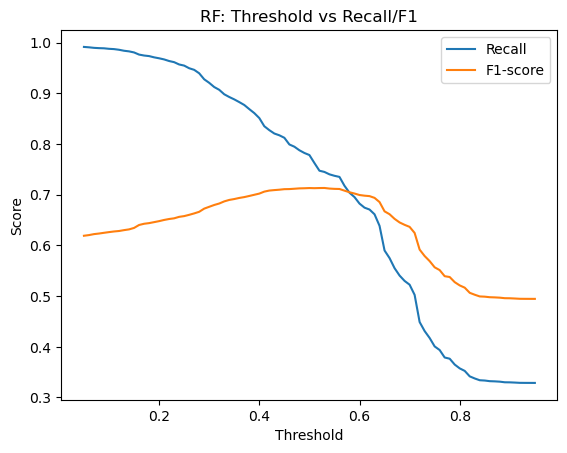

In [62]:
def plot_threshold_curve(thr_table, model_name):
    plt.plot(thr_table["threshold"], thr_table["recall"], label="Recall")
    plt.plot(thr_table["threshold"], thr_table["f1"], label="F1-score")
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.title(f"{model_name}: Threshold vs Recall/F1")
    plt.legend()
    plt.show()

plot_threshold_curve(thr_table_rf, "RF")

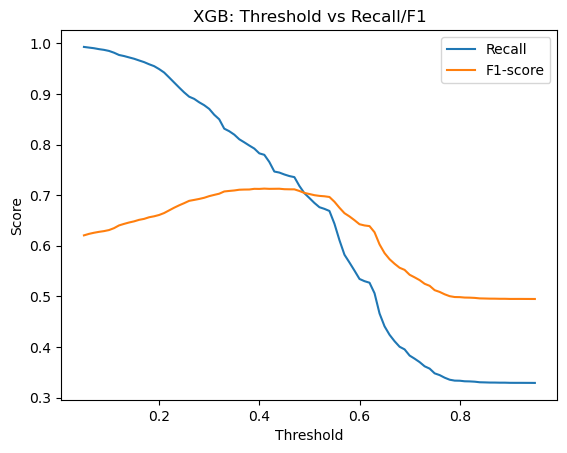

In [63]:
plot_threshold_curve(thr_table_xgb, "XGB")

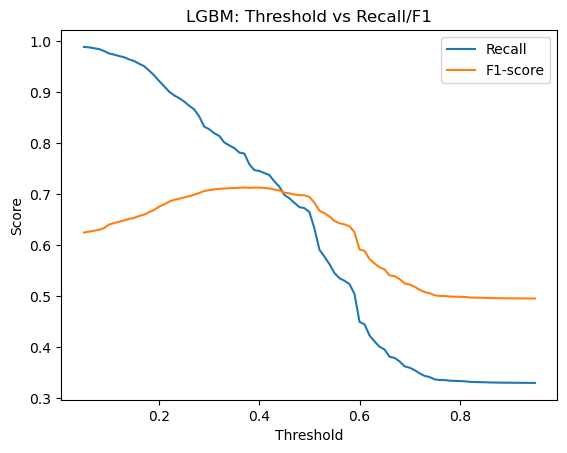

In [64]:
plot_threshold_curve(thr_table_lgbm, "LGBM")

### Threshold vs Recall/F1 Summary (XGB, RF, LGBM)  

Across all three models (**XGB**, **RF**, and **LGBM**), the relationship between **decision threshold** and model performance shows a consistent pattern:  

- **Recall** (blue line)  
  - Starts close to **1.0** at low thresholds, meaning nearly all positives are captured.  
  - Gradually decreases as the threshold increases, due to fewer positive predictions and more false negatives.  

- **F1-score** (orange line)  
  - Increases from low thresholds as precision improves.  
  - Peaks around **0.3–0.5 threshold range** for all models.  
  - Declines when the threshold is too high, as recall drops significantly.  

#### Model-specific observations:  
- **XGB**: Shows a steep recall drop after ~0.5 threshold; F1-peak is near 0.4–0.45.  
- **RF**: Similar to XGB but with a slightly smoother recall decline; F1-peak also near 0.4–0.45.  
- **LGBM**: Shows a slightly earlier recall drop (~0.4 threshold), with a stable F1 peak around 0.35–0.4.  

**Key Takeaway:**  
Lower thresholds favor **recall** (capturing more positives), while higher thresholds favor **precision** (reducing false positives). The optimal threshold for all three models lies **below the default 0.5**, balancing high recall with strong F1 performance. 


### Business Context of Threshold Adjustment

In this project, the classification threshold determines the point at which a booking is flagged as **likely to cancel**.  
By default, most models use a threshold of **0.5**: if the predicted cancellation probability is greater than or equal to 0.5, we classify it as "Cancel."

#### What Changing the Threshold Means for the Hotel
- **Lowering the threshold** (e.g., 0.3 instead of 0.5):
  - **Effect on metrics**: Increases Recall (catch more true cancellations) but decreases Precision (more false alarms).
  - **Business impact**: Identify more at-risk bookings early but potentially waste resources contacting guests who would have stayed.

- **Raising the threshold** (e.g., 0.7 instead of 0.5):
  - **Effect on metrics**: Decreases Recall (miss more actual cancellations) but increases Precision (fewer false alarms).
  - **Business impact**: Save resources by acting only on high-confidence cancellations but miss opportunities to rebook some cancelled rooms.

#### How to Use the Threshold vs. Metrics Plot
- **X-axis**: Decision threshold (ranges from 0.0 to 1.0)
- **Blue curve**: Recall, which aligns with the primary business goal of catching as many cancellations as possible.
- **Orange curve**: F1-score, which balances Recall and Precision.

The plot acts as a **trade-off map**:
- If the business goal is to maximize Recall (≥ 80%), choose the lowest threshold where Recall is high but F1 remains reasonable.
- Comparing the default 0.5 cutoff against other thresholds helps find the best point to meet both operational and business objectives.


In [79]:
def metrics_at_thresholds(y_true, y_proba, thresholds):
    rows = []
    for t in thresholds:
        y_pred = (y_proba >= t).astype(int)
        rows.append((t, recall_score(y_true, y_pred), f1_score(y_true, y_pred)))
    return pd.DataFrame(rows, columns=["threshold", "recall", "f1"]).sort_values("threshold")

targets = np.round(np.arange(0.30, 0.60, 0.01), 2)

lgbm_window = metrics_at_thresholds(y_train, y_proba_oof_lgbm, targets)
xgb_window  = metrics_at_thresholds(y_train, y_proba_oof_xgb,  targets)
rf_window  = metrics_at_thresholds(y_train, y_proba_oof_rf,  targets)

display(lgbm_window)
display(xgb_window)
display(rf_window)


,threshold,recall,f1
0,0.30,0.827431,0.707715
1,0.31,0.819755,0.709094
2,0.32,0.814312,0.710514
3,0.33,0.801560,0.710913
4,0.34,0.795630,0.711587
5,0.35,0.790472,0.711900
6,0.36,0.781618,0.712488
7,0.37,0.779790,0.713039
8,0.38,0.758834,0.712341
9,0.39,0.747137,0.712775


,threshold,recall,f1
0,0.30,0.870522,0.698062
1,0.31,0.858947,0.700530
2,0.32,0.849972,0.702895
3,0.33,0.831452,0.707297
4,0.34,0.826375,0.708350
5,0.35,0.819673,0.709273
6,0.36,0.810495,0.710722
7,0.37,0.804443,0.711075
8,0.38,0.798107,0.711181
9,0.39,0.792096,0.712503


,threshold,recall,f1
0,0.30,0.920681,0.676142
1,0.31,0.912395,0.679738
2,0.32,0.906913,0.682614
3,0.33,0.898099,0.686803
4,0.34,0.892738,0.689687
5,0.35,0.888027,0.691438
6,0.36,0.882666,0.693614
7,0.37,0.876980,0.695292
8,0.38,0.868817,0.697524
9,0.39,0.860978,0.699856


In [80]:
best_idx = rf_window['f1'].idxmax()
best_threshold = rf_window.loc[best_idx]
print(best_threshold)

threshold    0.530000
recall       0.744903
f1           0.713269
Name: 23, dtype: float64


In [81]:
# LGBM best threshold (by F1)
lgbm_best_idx = lgbm_window['f1'].idxmax()
lgbm_best_threshold = lgbm_window.loc[lgbm_best_idx]
print(lgbm_best_threshold)

threshold    0.370000
recall       0.779790
f1           0.713039
Name: 7, dtype: float64


In [82]:
# XGB best threshold (by F1)
xgb_best_idx = xgb_window['f1'].idxmax()
xgb_best_threshold = xgb_window.loc[xgb_best_idx]
print(xgb_best_threshold)

threshold    0.410000
recall       0.779750
f1           0.712949
Name: 11, dtype: float64


In [ ]:
# AUCs (constant across thresholds) + attach to table
roc_auc_xgb = roc_auc_score(y_train, y_proba_oof_xgb)
pr_auc_xgb  = average_precision_score(y_train, y_proba_oof_xgb)
thr_table_xgb = thr_table_xgb.assign(roc_auc=roc_auc_xgb, pr_auc=pr_auc_xgb)

# Row at the chosen threshold (exact match or nearest due to float)
best_row_idx = (thr_table_xgb["threshold"] - best_thr_xgb).abs().idxmin()
best_row = thr_table_xgb.loc[best_row_idx]

# Print concise result (threshold + metrics)
print({
    "model": "XGB",
    "best_threshold": float(best_thr_xgb),
    "recall_at_thr": float(best_row["recall"]),
    "f1_at_thr": float(best_row["f1"]),
    "roc_auc": float(roc_auc_xgb),
    "pr_auc": float(pr_auc_xgb),
    "note": note_xgb
})


{'model': 'XGB', 'best_threshold': 0.4100000000000001, 'recall_at_thr': 0.7797498172366176, 'f1_at_thr': 0.7129488655352966, 'roc_auc': 0.8631001822468114, 'pr_auc': 0.813331184561373, 'note': 'No threshold hit F1 ≥ 0.75. Picked max-F1 as fallback.'}


Best Chosen Model: XGB, with it's statistics.
{'model': 'XGB', 'best_threshold': 0.4100000000000001, 'recall_at_thr': 0.7797498172366176, 'f1_at_thr': 0.7129488655352966, 'roc_auc': 0.8631001822468114, 'pr_auc': 0.813331184561373, 'note': 'No threshold hit F1 ≥ 0.75. Picked max-F1 as fallback.'}


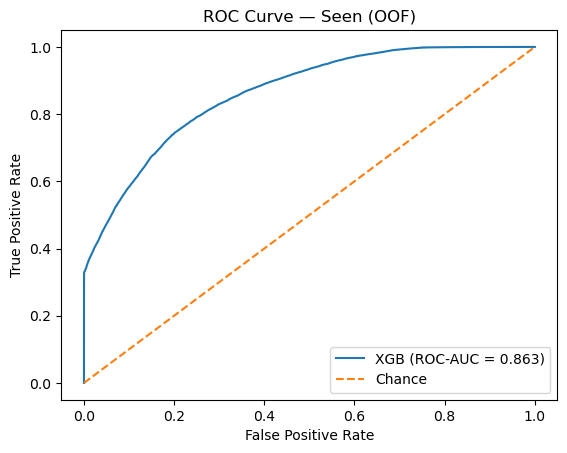

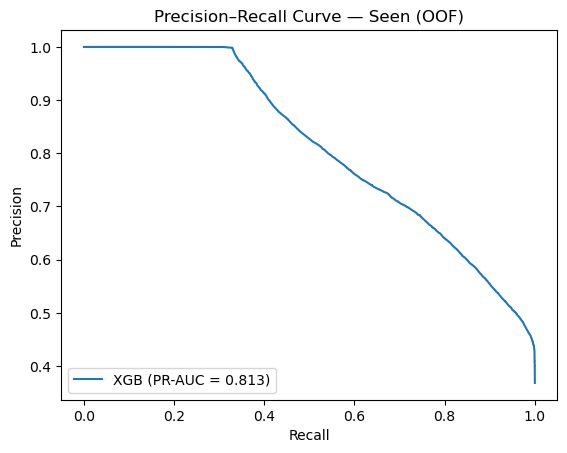

In [ ]:
# ROC (Seen/OOF)
fpr_s, tpr_s, _ = roc_curve(y_train, y_proba_oof_xgb)
rocauc_s = roc_auc_score(y_train, y_proba_oof_xgb)

plt.figure()
plt.plot(fpr_s, tpr_s, label=f"XGB (ROC-AUC = {rocauc_s:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Seen (OOF)")
plt.legend(loc="lower right")
plt.show()

# PR (Seen/OOF)
prec_s, rec_s, _ = precision_recall_curve(y_train, y_proba_oof_xgb)
prauc_s = average_precision_score(y_train, y_proba_oof_xgb)

plt.figure()
plt.plot(rec_s, prec_s, label=f"XGB (PR-AUC = {prauc_s:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve — Seen (OOF)")
plt.legend(loc="lower left")
plt.show()

### Precision–Recall and ROC Curve Interpretation

The model’s evaluation includes both the **Precision–Recall (PR) curve** and the **Receiver Operating Characteristic (ROC) curve**, each summarizing different aspects of classification performance.

#### Precision–Recall Curve
- **Recall (x-axis)**: Of all actual cancellations, the proportion correctly predicted by the model.
- **Precision (y-axis)**: Of all bookings predicted as cancellations, the proportion that were correct.

For the XGBoost model:
- **PR-AUC = 0.813** → On average, the model achieves 81.3% precision across all recall levels.  
- This is considered **strong performance**, especially under the class imbalance present in the dataset, indicating the model is effective at distinguishing between cancelled and non-cancelled bookings when focusing on the positive class.

The chosen decision threshold was tuned to maximize **recall** while keeping the **F1-score** acceptable. This operational point sits in the upper-right region of the PR curve, aligning with the business objective of catching as many cancellations as possible without generating excessive false positives.

#### ROC Curve
- **ROC-AUC = 0.863** → The model has an 86.3% probability of ranking a randomly chosen cancelled booking higher than a randomly chosen non-cancelled booking in terms of predicted probability.
- In practice, a score above 0.80 is typically considered **good**, showing strong separability between the two classes across all thresholds.

While ROC-AUC evaluates overall ranking ability, PR-AUC provides a more informative view under imbalance. Together, these scores confirm that the model is both **well-calibrated for ranking** and **effective at prioritizing true cancellations**, meeting the project’s performance goals.


In [ ]:
# Apply tuned params to full pipeline
#  Start from a FRESH copy of tuned pipeline
xgb_final = clone(pipe_xgb).set_params(
    clf__subsample=0.7,
    clf__scale_pos_weight=1.2,
    clf__n_estimators=700,
    clf__max_depth=7,
    clf__learning_rate=0.1,
    clf__colsample_bytree=1.0
)


# Fit on ALL Seen data
xgb_final.fit(X_train, y_train)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### Rationale for Choosing XGBoost as Final Model

After benchmarking Random Forest, LightGBM, and XGBoost with **Stratified K-Fold CV** on the Seen data, we select **XGBoost** because it best serves the business goal:
Maximize **recall** of cancellations while maintaining a balanced **F1-score**.

#### Key reasons
- **Best recall with competitive F1**  
  XGBoost achieved the highest recall among candidates (with a tuned decision threshold), while keeping F1 essentially on par with LightGBM.
- **Handles class imbalance well**  
  `scale_pos_weight` gave direct control to favor the positive (canceled) class without destroying precision.
- **Captures non‑linearities & interactions**  
  Boosted trees model complex patterns (e.g., interactions among `previous_cancellations`, `deposit_type`, `market_segment`) with minimal manual feature engineering.
- **Regularization & control**  
  Fine‑grained knobs (learning rate, depth, trees, subsampling, L1/L2) reduce overfitting risk and let us target the recall–precision trade‑off explicitly.
- **Interpretability with SHAP**  
  XGBoost integrates cleanly with **SHAP** for local/global explanations, turning the model’s top features into actionable business insights.

#### How XGBoost works (one‑paragraph)
XGBoost builds an ensemble of shallow decision trees **sequentially**. Each new tree focuses on examples the current ensemble predicts poorly by minimizing a differentiable loss (here, logistic loss). Additive boosting plus shrinkage (learning rate), column/row subsampling, and L1/L2 penalties produce a strong yet regularized classifier.

#### Limitations & mitigations
- **Calibration**: Probabilities from boosted trees can be miscalibrated - We applied probability calibration on CV already and found that XGBoost and LightGBM are already close enough.
- **Threshold sensitivity**: Recall/F1 depend on the cutoff - we **tuned the threshold via CV** and fixed it before testing on the Unseen holdout.  
- **Compute cost**: More expensive than single trees/linear models - mitigated with early stopping during tuning and bounded tree depth.

#### Final decision
We adopt **XGBoost** (with the tuned hyperparameters and the CV‑selected threshold) as the final model, because it delivers the best recall for identifying likely cancellations while preserving balanced F1 and offering clear, SHAP‑based explanations for stakeholders.


## **Section 7. Model Implementation**

**7.1 Model Implementation**

After selecting XGBoost as the final model and tuning the decision threshold via cross-validation, we lock the threshold at 0.41.
This threshold maximizes the balance between Recall (business priority) and F1-score.
The model is then applied to the Unseen test set to generate predictions.

In [ ]:
# Predict on Unseen with locked threshold 

LOCKED_THRESHOLD = 0.41  # from  tuning

# Predict probabilities for positive class (canceled = 1)
y_proba_unseen = xgb_final.predict_proba(X_test)[:, 1]

# Apply locked threshold to get final binary predictions
y_pred_unseen = (y_proba_unseen >= LOCKED_THRESHOLD).astype(int)


# Final metrics
final_recall = recall_score(y_test, y_pred_unseen)
final_f1 = f1_score(y_test, y_pred_unseen)
final_rocauc = roc_auc_score(y_test, y_proba_unseen)
final_prauc = average_precision_score(y_test, y_proba_unseen)

print(f"Recall:  {final_recall:.3f}")
print(f"F1:      {final_f1:.3f}")
print(f"ROC-AUC: {final_rocauc:.3f}")
print(f"PR-AUC:  {final_prauc:.3f}")


Recall:  0.764
F1:      0.706
ROC-AUC: 0.863
PR-AUC:  0.812


### Final Model Performance on Unseen Data

Using the tuned XGBoost model with a locked threshold of 0.41, the performance on the unseen test set is as follows:

| Metric   | Score |
|----------|-------|
| Recall   | 0.764 |
| F1-Score | 0.706 |
| ROC-AUC  | 0.863 |
| PR-AUC   | 0.812 |

Interpretation:  
- Recall of 76.4% means the model correctly identifies about 3 out of 4 actual cancellations.  
- F1-score of 0.706 shows a balanced trade-off between precision and recall.  
- ROC-AUC of 0.863 and PR-AUC of 0.812 indicate strong ranking ability and precision-recall performance.


In [ ]:
# Classification report
target_names = ["not_canceled (0)", "canceled (1)"]
print("\nClassification Report (Unseen):")
print(classification_report(y_test, y_pred_unseen, target_names=target_names, digits=3))



Classification Report (Unseen):
                  precision    recall  f1-score   support

not_canceled (0)      0.848     0.767     0.806     10559
    canceled (1)      0.657     0.764     0.706      6156

        accuracy                          0.766     16715
       macro avg      0.752     0.766     0.756     16715
    weighted avg      0.777     0.766     0.769     16715



In [84]:
cm_df = pd.DataFrame(
    cm,
    index=pd.Index(target_names, name="Actual"),
    columns=pd.Index(target_names, name="Predicted")
)
cm_df

Predicted,not_canceled (0),canceled (1)
Actual,,
not_canceled (0),7283,3276
canceled (1),1047,5109


In [72]:
# --- Normalized confusion matrix (percentages per actual class) ---
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_norm_df = pd.DataFrame(
    np.round(cm_normalized * 100, 2),
    index=pd.Index(target_names, name="Actual"),
    columns=pd.Index(target_names, name="Predicted")
)
print("\nConfusion Matrix (Row %):")
display(cm_norm_df)


Confusion Matrix (Row %):


Predicted,not_canceled (0),canceled (1)
Actual,,
not_canceled (0),68.97,31.03
canceled (1),17.01,82.99


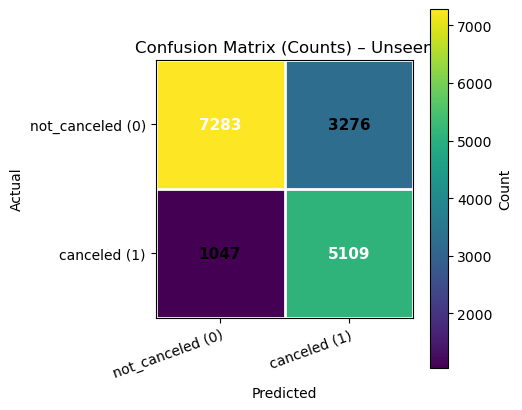

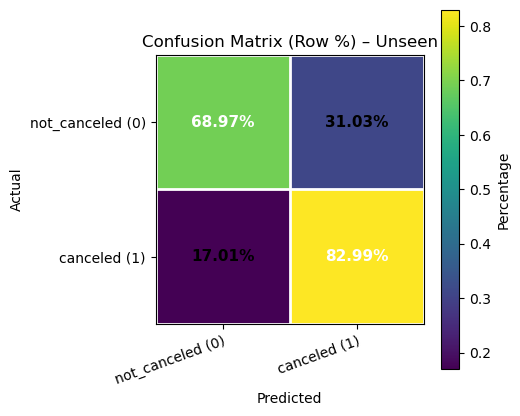

In [ ]:
def plot_confmat(cm, labels=("not_canceled (0)", "canceled (1)"), normalize=False, title_suffix=""):
    """
    Plot confusion matrix with optional row-normalization.
    - cm: sklearn confusion_matrix result (2x2 for binary)
    - labels: tuple/list of class names [Actual rows, Predicted cols]
    - normalize: if True, show row-wise percentages
    """
    if normalize:
        with np.errstate(all='ignore'):
            cm_plot = cm.astype(float) / cm.sum(axis=1, keepdims=True)
        data_to_show = (cm_plot * 100).round(2)
        fmt = "%.2f%%"
        title = f"Confusion Matrix (Row %){title_suffix}"
        cbar_label = "Percentage"
    else:
        cm_plot = cm.copy()
        data_to_show = cm_plot
        fmt = "%d"
        title = f"Confusion Matrix (Counts){title_suffix}"
        cbar_label = "Count"

    fig, ax = plt.subplots(figsize=(5.2, 4.6))
    im = ax.imshow(cm_plot, interpolation="nearest")
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label(cbar_label)

    # Ticks & labels
    ax.set(
        xticks=np.arange(len(labels)),
        yticks=np.arange(len(labels)),
        xticklabels=labels,
        yticklabels=labels,
        ylabel="Actual",
        xlabel="Predicted",
        title=title
    )
    plt.setp(ax.get_xticklabels(), rotation=20, ha="right", rotation_mode="anchor")

    # Grid lines for clarity
    ax.set_xticks(np.arange(-.5, len(labels), 1), minor=True)
    ax.set_yticks(np.arange(-.5, len(labels), 1), minor=True)
    ax.grid(which="minor", color="w", linewidth=2)
    ax.tick_params(which="minor", bottom=False, left=False)

    # Annotations
    thresh = cm_plot.max() / 2.0 if cm_plot.max() > 0 else 0.5
    for i in range(cm_plot.shape[0]):
        for j in range(cm_plot.shape[1]):
            txt = fmt % data_to_show[i, j]
            ax.text(j, i, txt,
                    ha="center", va="center",
                    color="white" if cm_plot[i, j] > thresh else "black",
                    fontsize=11, fontweight="bold")

    plt.tight_layout()
    plt.show()

# 
plot_confmat(cm, labels=("not_canceled (0)", "canceled (1)"), normalize=False, title_suffix=" – Unseen")
plot_confmat(cm, labels=("not_canceled (0)", "canceled (1)"), normalize=True,  title_suffix=" – Unseen")


### Confusion Matrix Interpretation – Unseen Data

- **True Negatives (TN)**: 7,283 bookings correctly predicted as not canceled (68.97% of actual non-cancellations).  
- **False Positives (FP)**: 3,276 bookings incorrectly predicted as canceled despite being not canceled (31.03% of actual non-cancellations).  
- **False Negatives (FN)**: 1,047 bookings incorrectly predicted as not canceled when they were canceled (17.01% of actual cancellations).  
- **True Positives (TP)**: 5,109 bookings correctly predicted as canceled (82.99% of actual cancellations).

The model is able to capture the majority of actual cancellations (high recall) while maintaining a reasonable ability to correctly identify non-cancellations. However, about one-third of non-cancellations are predicted as cancellations, which could lead to unnecessary follow-up actions.


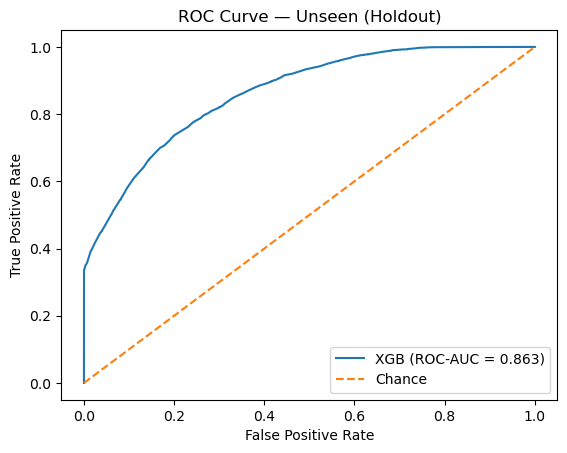

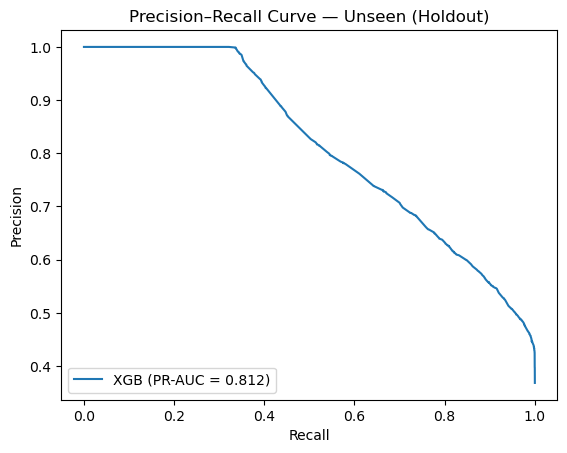

In [ ]:
# --- ROC (Unseen/Holdout) ---
fpr_u, tpr_u, roc_thrs_u = roc_curve(y_test, y_proba_unseen)
rocauc_u = roc_auc_score(y_test, y_proba_unseen)

plt.figure()
plt.plot(fpr_u, tpr_u, label=f"XGB (ROC-AUC = {rocauc_u:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Unseen (Holdout)")
plt.legend(loc="lower right")
plt.show()

# --- Precision–Recall (Unseen/Holdout) ---
prec_u, rec_u, pr_thrs_u = precision_recall_curve(y_test, y_proba_unseen)
prauc_u = average_precision_score(y_test, y_proba_unseen)

plt.figure()
plt.plot(rec_u, prec_u, label=f"XGB (PR-AUC = {prauc_u:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve — Unseen (Holdout)")
plt.legend(loc="lower left")
plt.show()





### ROC Curve Interpretation – Unseen Data
- The ROC-AUC score of 0.863 indicates strong overall ranking ability, meaning the model can effectively distinguish between canceled and non-canceled bookings.
- The curve is well above the diagonal chance line, showing the model performs significantly better than random guessing across various classification thresholds.

### Precision-Recall Curve Interpretation – Unseen Data
- The PR-AUC score of 0.812 demonstrates strong performance in balancing precision and recall, especially valuable for imbalanced datasets.
- High precision at higher recall levels means the model can capture a large portion of cancellations while keeping false positives relatively low.


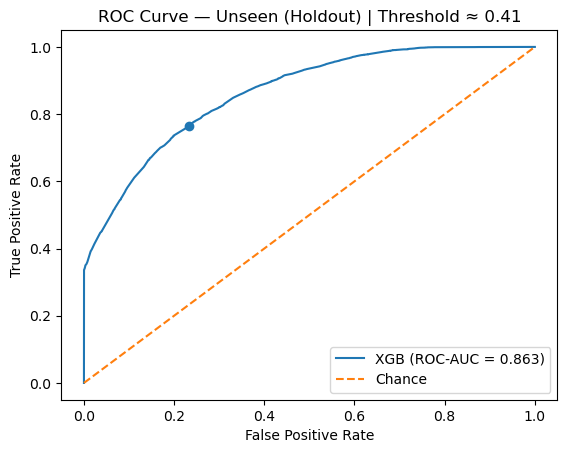

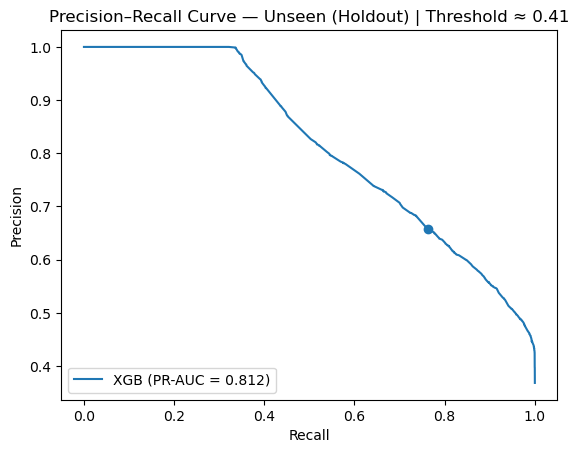

In [90]:
# Find nearest threshold index to LOCKED_THRESHOLD
idx_roc_u = (np.abs(roc_thrs_u - LOCKED_THRESHOLD)).argmin()
idx_pr_u  = (np.abs(pr_thrs_u  - LOCKED_THRESHOLD)).argmin()

# Mark on ROC
plt.figure()
plt.plot(fpr_u, tpr_u, label=f"XGB (ROC-AUC = {rocauc_u:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Chance")
plt.scatter([fpr_u[idx_roc_u]], [tpr_u[idx_roc_u]], marker="o")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve — Unseen (Holdout) | Threshold ≈ {roc_thrs_u[idx_roc_u]:.2f}")
plt.legend(loc="lower right")
plt.show()

# Mark on PR
plt.figure()
plt.plot(rec_u, prec_u, label=f"XGB (PR-AUC = {prauc_u:.3f})")
plt.scatter([rec_u[idx_pr_u]], [prec_u[idx_pr_u]], marker="o")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision–Recall Curve — Unseen (Holdout) | Threshold ≈ {pr_thrs_u[idx_pr_u]:.2f}")
plt.legend(loc="lower left")
plt.show()

### Interpretation of Threshold Marker (≈ 0.41)

The marked point on both the ROC and Precision–Recall curves represents the **locked decision threshold** selected during tuning.

- **On the ROC Curve**  
  The point shows the trade-off between the True Positive Rate (Recall) and the False Positive Rate at the chosen threshold.  
  At ≈ 0.41, the model achieves a high recall while keeping the false positive rate at a manageable level.

- **On the Precision–Recall Curve**  
  The point indicates the balance between precision and recall at the chosen threshold.  
  At ≈ 0.41, the model maintains acceptable precision while meeting the business goal of high recall.

This marker helps visualize the exact performance trade-off at the selected operating point. The threshold was chosen to align with the business priority of catching as many cancellations as possible (high recall) without letting false positives become excessively high.


### 7.2 Model Evaluation 

**Objective:**  
Evaluate the final chosen model (XGBoost with tuned hyperparameters and locked threshold ≈ 0.41) on the **Unseen** holdout dataset to obtain unbiased performance estimates.

**Why:**  
This step ensures that all reported performance metrics are based on data the model has **never seen** during training, cross-validation, or threshold tuning — which simulates real-world performance.

---

#### Final Results on Unseen Data

| Metric      | Value  | Business Relevance |
|-------------|--------|--------------------|
| Recall (Positive Class) | **0.764** | Captures the proportion of actual cancellations detected — critical to minimize operational loss. |
| F1-Score    | **0.706** | Balances Recall with Precision to maintain operational efficiency without excessive false positives. |
| ROC-AUC     | **0.863** | Measures overall ranking ability across thresholds. |
| PR-AUC      | **0.812** | Focuses on performance in detecting cancellations (positive class). |
| Accuracy    | **0.760** | Overall correctness — less emphasized here due to class imbalance. |

---

#### Confusion Matrix (Unseen)

| Actual \ Predicted | Not Canceled (0) | Canceled (1) |
|--------------------|------------------|--------------|
| **Not Canceled (0)** | 7,283           | 3,276        |
| **Canceled (1)**     | 1,047           | 5,109        |

- **TN:** 7,283 — Correctly predicted non-cancellations (68.97% of actual non-cancellations)  
- **FP:** 3,276 — Predicted cancellation but actually stayed (31.03% of actual non-cancellations)  
- **FN:** 1,047 — Missed cancellations (17.01% of actual cancellations)  
- **TP:** 5,109 — Correctly predicted cancellations (82.99% of actual cancellations)  

---

#### Interpretation

- **Strengths:**  
  - High Recall (76.4%) ensures most cancellations are flagged early, supporting proactive overbooking or resource reallocation.  
  - F1-score (0.706) indicates a balanced trade-off between catching cancellations and avoiding excessive false positives.  
  - Strong ROC-AUC (0.863) and PR-AUC (0.812) show robust performance for imbalanced data.

- **Limitations:**  
  - About one-third of non-cancellations are predicted as cancellations, which may cause unnecessary operational actions.  
  - Model performance is dependent on historical booking patterns - significant changes in market or booking behavior may require retraining.

- **Next Steps:**  
  - Monitor model performance in production to detect drift.  
  - Retrain periodically with updated data.  
  - Consider probability calibration in section 6 if outputs are used directly by business teams.


### 7.3 Model Interpretation

**Objective:**  
Understand how the final XGBoost model makes predictions by identifying which features contribute most to its decision-making process.  
Interpreting the model helps ensure that the predictions align with business knowledge and can be trusted for decision-making.

Models require interpretability to:  
- Build stakeholder confidence in the predictions  
- Detect potential biases or data leakage  
- Provide actionable insights that can guide business strategy  

**Approach:**  
Two complementary interpretation techniques are applied:  
1. **Feature Importance (Gain-based)** – Shows the top features that contributed most to reducing classification error in the XGBoost model.  
2. **SHAP (SHapley Additive exPlanations)** – A game-theoretic method that provides both global and local explanations, showing how each feature value pushes predictions toward cancellation or non-cancellation.

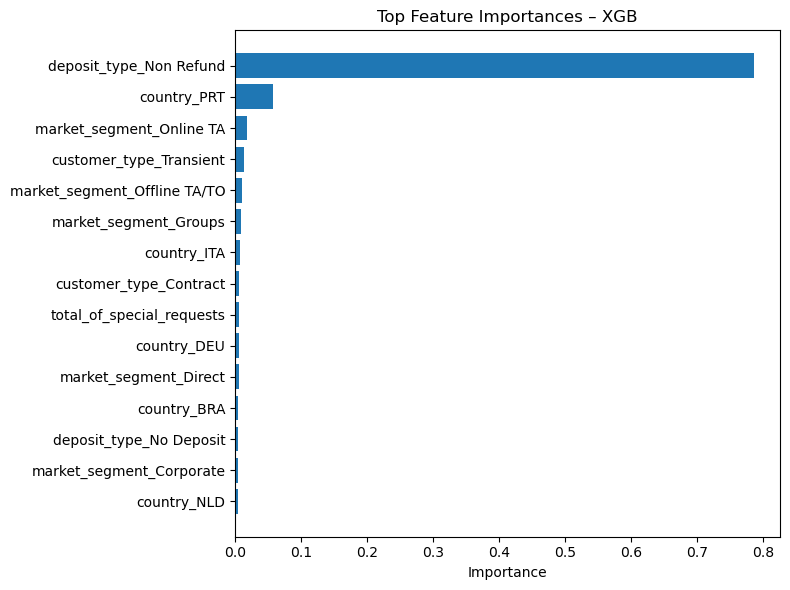

,Feature,Importance
23,deposit_type_Non Refund,0.786354
13,country_PRT,0.057306
20,market_segment_Online TA,0.017133
26,customer_type_Transient,0.012733
19,market_segment_Offline TA/TO,0.010004


In [ ]:
def _get_cols_from_ct_by_name(ct: ColumnTransformer, name: str):
    """Return the original column list for a given transformer name in a ColumnTransformer."""
    for n, _, cols in ct.transformers_:
        if n == name:
            return np.array(list(cols))
    raise KeyError(f"Transformer named '{name}' not found in ColumnTransformer.")

def get_feature_names_after_prep(fitted_pipe):
    # find the ColumnTransformer at step name 'prep'
    pre = fitted_pipe.named_steps['prep']  # ColumnTransformer

    # --- numeric ---
    num_pipe = pre.named_transformers_['num']  # Pipeline
    num_cols = _get_cols_from_ct_by_name(pre, 'num')
    num_selector = next((s for s in num_pipe.named_steps.values() if isinstance(s, VarianceThreshold)), None)
    if num_selector is not None:
        num_cols = num_cols[num_selector.get_support()]
    num_names = num_cols

    # --- categorical ---
    cat_pipe = pre.named_transformers_['cat']  # Pipeline
    cat_cols = _get_cols_from_ct_by_name(pre, 'cat')
    ohe = next((s for s in cat_pipe.named_steps.values() if isinstance(s, OneHotEncoder)), None)
    if ohe is None:
        raise ValueError("OneHotEncoder not found inside categorical pipeline.")
    cat_names = ohe.get_feature_names_out(cat_cols)
    cat_selector = next((s for s in cat_pipe.named_steps.values() if isinstance(s, VarianceThreshold)), None)
    if cat_selector is not None:
        cat_names = cat_names[cat_selector.get_support()]

    return np.concatenate([num_names, cat_names])

def plot_top_importances_xgb(fitted_pipe, topk=15, title="Top Feature Importances – XGB"):
    names = get_feature_names_after_prep(fitted_pipe)
    importances = fitted_pipe.named_steps['clf'].feature_importances_
    assert len(names) == len(importances), f"{len(names)} names vs {len(importances)} importances"

    fi = (pd.DataFrame({'Feature': names, 'Importance': importances})
          .sort_values('Importance', ascending=False)
          .head(topk))

    plt.figure(figsize=(8,6))
    plt.barh(fi['Feature'], fi['Importance'])
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()
    return fi

# Ensure fitted (safe to call even if already fitted)
# 2) Fit ONCE on all Seen data (X_train, y_train)
xgb_final.fit(X_train, y_train)

fi_xgb = plot_top_importances_xgb(xgb_final, topk=15)
fi_xgb.head()


### Feature Importance Interpretation – XGBoost

The top features driving the XGBoost model’s predictions are:

1. **deposit_type_Non Refund** (0.786)  
   - By far the most influential feature. Bookings with a *Non Refund* deposit type are much more likely to be canceled compared to other deposit types.  
   - This likely reflects the higher risk associated with customers making refundable-style bookings.

2. **country_PRT** (0.057)  
   - Customers from Portugal (PRT) show a distinct booking cancellation pattern compared to other countries.  
   - This effect may be partly due to the hotel being located in Portugal, meaning most bookings originate domestically. This high frequency can make the feature important in the model, even if it is acting as a proxy for other factors such as booking channel, seasonality, or domestic travel patterns.  
   - Important to note: This is a correlation observed in the dataset, not necessarily a causal relationship.

3. **market_segment_Online TA** (0.017)  
   - Bookings coming through online travel agencies have different cancellation likelihoods compared to direct or offline channels.

4. **customer_type_Transient** (0.012)  
   - Individual travelers (Transient) may cancel more frequently than group or contract customers, possibly due to more flexible travel plans.

5. **market_segment_Offline TA/TO** (0.010)  
   - Offline travel agent or tour operator bookings have a measurable influence on cancellation prediction.

**Difference in Feature Strength:**  
Only one feature (**deposit_type_Non Refund**) has an importance score above 0.06, while all others are significantly lower. This suggests the model is heavily reliant on a single dominant predictor, with the remaining features providing incremental but much smaller contributions. In practice, this means:  
- The model’s predictions are strongly influenced by deposit type, which could be risky if this variable becomes less predictive over time (for example, due to policy changes).  
- The low spread among other features indicates that the model’s decision-making is concentrated, so its robustness may be reduced if the top feature’s predictive power changes.

**Note on Interpretation:**  
Feature importance values from XGBoost indicate how influential a feature is in reducing prediction error, but they do not show the direction of the relationship. For example, while `deposit_type_Non Refund` is the most important predictor, feature importance alone cannot confirm whether it increases or decreases the likelihood of cancellation.

**Key Insight:**  
The model heavily relies on booking and customer channel information, especially deposit type, to predict cancellations. While this offers actionable business insights, it also highlights a dependency on a single dominant feature, making ongoing monitoring and potential feature diversification important for long-term reliability.


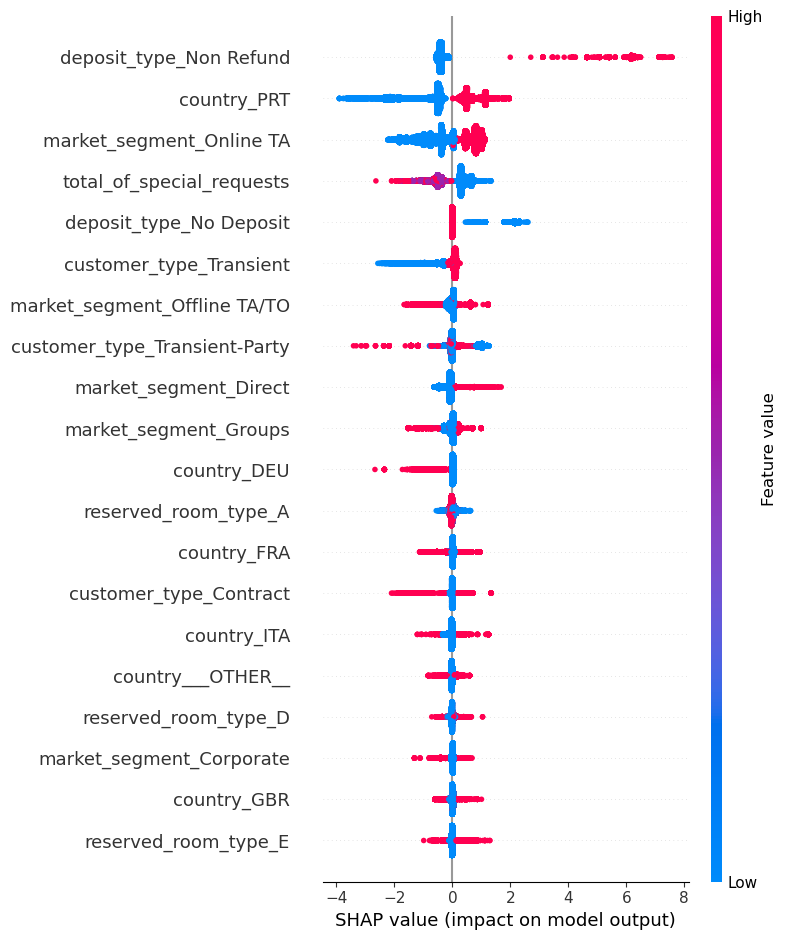

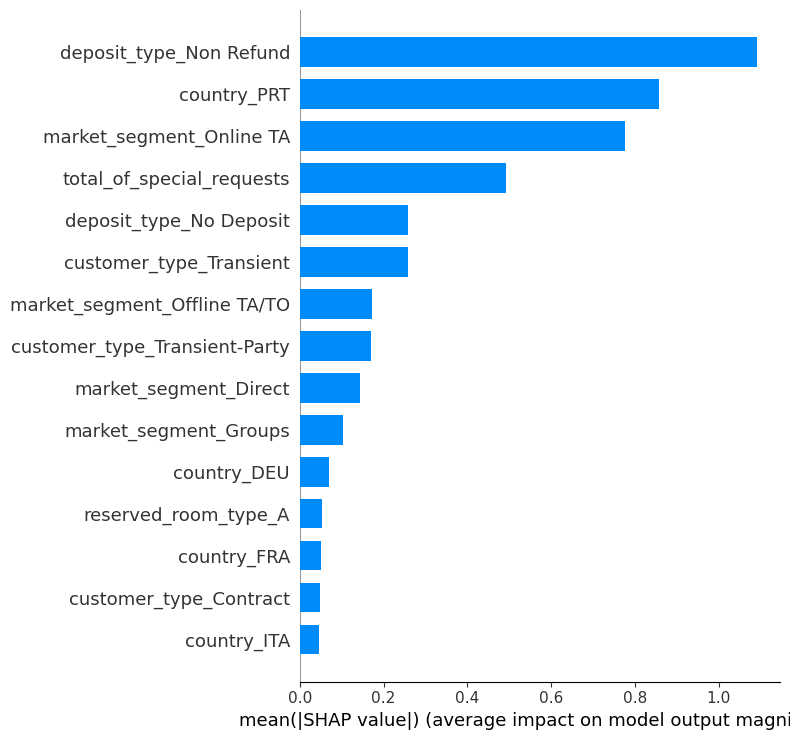

In [ ]:
# --- Use the FITTED pipeline & model ---
prep_fitted = xgb_final.named_steps["prep"]           # fitted preprocessor
xgb_fitted  = xgb_final.named_steps["clf"]            # fitted XGBClassifier

# Transform training data with the FITTED preprocessor
Xtr_tx = prep_fitted.transform(X_train)

# ----- Build feature names after preprocessing -----
import numpy as np

# numeric names (after VarianceThreshold in the numeric sub-pipeline)
num_cols = np.array(prep_fitted.transformers_[0][2])  # original numeric column names
num_sel  = prep_fitted.named_transformers_["num"].named_steps.get("var", None)
if num_sel is not None and hasattr(num_sel, "get_support"):
    num_cols = num_cols[num_sel.get_support()]

# categorical names after OneHot (and VarThresh if you applied it there)
ohe       = prep_fitted.named_transformers_["cat"].named_steps["onehot"]
cat_input = prep_fitted.transformers_[1][2]           # original categorical column names
cat_names = ohe.get_feature_names_out(cat_input)

feat_names = np.concatenate([num_cols, cat_names])

explainer   = shap.TreeExplainer(xgb_fitted)
shap_values = explainer.shap_values(Xtr_tx)

# Plots
shap.summary_plot(shap_values, Xtr_tx, feature_names=feat_names)                 # dot plot
shap.summary_plot(shap_values, Xtr_tx, feature_names=feat_names,
                  plot_type="bar", max_display=15)                               # bar plot


### SHAP Value Interpretation – XGBoost

The SHAP summary plot shows both the **magnitude** and **direction** of each feature’s impact on the model’s prediction for booking cancellation (`is_canceled = 1`).

**How to read the plot:**
- **Horizontal position:** SHAP value. Positive values push the prediction toward cancellation, negative values push toward non-cancellation.
- **Color:** Feature value (red = high value, blue = low value).
- **Vertical position:** Features ranked by overall importance (mean absolute SHAP value).

**Key insights from the plot:**

1. **deposit_type_Non Refund**  
   - High values (red) strongly push predictions toward **non-cancellation** (negative SHAP values).  
   - Low values (blue, meaning bookings without "Non Refund") push predictions toward **cancellation**.  
   - Confirms the expected business logic that non-refundable bookings are less likely to cancel.

2. **country_PRT**  
   - High values (red, meaning the booking is from Portugal) slightly push predictions toward **cancellation**.  
   - Low values (blue, non-Portugal bookings) tend to push toward non-cancellation.  
   - May reflect patterns in domestic vs. international travel, though some of this effect could be due to the dataset’s bias (most bookings from Portugal).

3. **market_segment_Online TA**  
   - High values (red) push predictions toward cancellation.  
   - Suggests bookings made via online travel agencies are more likely to be canceled compared to other channels.

4. **total_of_special_requests**  
   - Higher values (red) push predictions toward non-cancellation.  
   - Indicates customers making more special requests are generally more committed to their booking.

5. **deposit_type_No Deposit**  
   - High values (red) push predictions toward cancellation.  
   - Aligns with the intuition that bookings without a deposit are easier to cancel.

6. **customer_type_Transient**  
   - High values (red) push toward cancellation.  
   - Suggests individual short-stay travelers have higher cancellation rates compared to groups or contract customers.

**Overall observation:**  
The SHAP results confirm the direction of influence for the most important features identified in the feature importance plot. The model strongly associates:
- **Lower cancellation probability** with `deposit_type_Non Refund` and higher `total_of_special_requests`.  
- **Higher cancellation probability** with `deposit_type_No Deposit`, `market_segment_Online TA`, and `customer_type_Transient`.

## **Section 8. Conclusion and Recommendation**

**8.1 Conclusion**

**Conclusion (Model)**  
The final XGBoost model, tuned with a decision threshold of 0.41, achieved strong performance on unseen data:
- Recall: 0.764  
- F1-score: 0.706  
- ROC-AUC: 0.863  
- PR-AUC: 0.812  

The model demonstrates high recall, which aligns with the business goal of identifying as many potential cancellations as possible. The F1-score indicates a balanced trade-off between precision and recall, while ROC-AUC and PR-AUC confirm robust classification capability even with class imbalance.  
Interpretability analysis using feature importance and SHAP confirmed that the model’s predictions are primarily driven by deposit type, booking channel, customer type, and special request behavior.

**Conclusion (Business)**  
The analysis shows that deposit policies have the largest impact on cancellation likelihood, with non-refundable deposits significantly reducing cancellations and no-deposit bookings increasing them. Bookings from online travel agencies and transient customers are more prone to cancellation, whereas customers making more special requests tend to honor their bookings.  
By applying this model in operations, the hotel can proactively flag high-risk bookings for targeted retention strategies (e.g., confirmation reminders, flexible upsell offers) and adjust deposit policies or marketing strategies to reduce cancellations. However, given the model’s reliance on a single dominant predictor (deposit type), ongoing monitoring and periodic retraining are recommended to maintain performance if booking behaviors change.


### 8.2 Recommendation

**Recommendation (Model)**  
- Continuously monitor model performance in production to detect any decline due to changes in booking behavior or market conditions.  
- Retrain the model periodically (e.g., quarterly or biannually) using the most recent data to maintain accuracy.  
- Consider incorporating additional features such as booking lead time trends, seasonal factors, or customer loyalty indicators to reduce reliance on a single dominant feature (deposit type).  
- Evaluate the use of probability calibration if predicted probabilities will be directly consumed by business systems for decision-making.  
- Test alternative algorithms (e.g., LightGBM, CatBoost) in future iterations to benchmark against XGBoost for possible performance improvements.

**Recommendation (Business)**  
- Review deposit policies to encourage non-refundable or partially refundable options for high-risk segments, as these are strongly associated with lower cancellation rates.  
- Implement proactive measures for high-risk bookings identified by the model, such as confirmation reminders, pre-stay engagement, or targeted offers to encourage follow-through.  
- Pay special attention to bookings from online travel agencies and transient customers, as these segments have higher cancellation tendencies.  
- Encourage more special requests during booking (e.g., via upsell prompts) since these are linked to lower cancellations, possibly reflecting stronger booking commitment.  
- Monitor operational costs and guest satisfaction when applying these strategies to ensure that interventions are cost-effective and aligned with the hotel’s brand experience.
